# What do business cycles and trends look like in US , Turkey and Germany?

### **Authors: Yan Ming (Joshua) Leung**

### Summary

- Consumption and investment are positively correlated with their real output
- Although investment constitutes a smaller fraction, consumption fluctuates less than investment
- The correlation coefficients between investment and real GDP are somewhat higher than the correlation coefficients between consumption and real GDP
- German and Turkish business cycles appear to be slightly uncorrelated with each other

### Objective
- RBC models explain the procyclical nature of employment, labour productivity and the real wage and also explain why investment is more volatile than consumption.
- RBC theory also predicts that the price level will be countercyclical when the empirical evidence for real output and inflation.
- The below analysis is to compare the finding of RBC thoery with the stylized facets.
- Implied the RBC is not conclusive.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
start = dt.datetime(2006,1,1)
end = dt.date(2022,3,1)

In [3]:
from fredapi import Fred
fred = Fred(api_key='31db874c57f9b135f15abe9bca68efa1')

In [4]:
# Retrieved from FRED, Federal Reserve Bank of St. Louis
gdp_us = web.DataReader(name='GDPC1',data_source='fred', start=start, end=end)
gdp_tur = web.DataReader(name='NAEXKP01TRQ652S' ,data_source= 'fred',start=start, end=end)
gdp_ger = web.DataReader(name='CPMNACSCAB1GQDE',data_source= 'fred',start=start, end=end)

In [5]:
gdp_us = gdp_us*1e09
gdp_us.tail()

,GDPC1
DATE,
2021-01-01,1.905566e+13
2021-04-01,1.936831e+13
2021-07-01,1.947889e+13
2021-10-01,1.980629e+13
2022-01-01,1.972792e+13


In [6]:
gdp_tur.tail()

,NAEXKP01TRQ652S
DATE,
2021-01-01,4.860681e+11
2021-04-01,4.942733e+11
2021-07-01,5.079842e+11
2021-10-01,5.156597e+11
2022-01-01,5.218508e+11


In [7]:
# It was in millions of Euros
gdp_ger = gdp_ger*1e06
gdp_ger.tail()

,CPMNACSCAB1GQDE
DATE,
2021-01-01,8.707220e+11
2021-04-01,8.891230e+11
2021-07-01,9.094310e+11
2021-10-01,9.232390e+11
2022-01-01,9.427560e+11


In [8]:
gdp_us.index.freq='QS'
gdp_tur.index.freq='QS'
gdp_ger.index.freq='Qs'

### Rename the columns

In [9]:
gdp_us.rename(columns = {gdp_us.columns[0]: "gdp_us"}, inplace=True)
gdp_tur.rename(columns={gdp_tur.columns[0]:"gdp_tur"}, inplace=True)
gdp_ger.rename(columns={gdp_ger.columns[0]:"gdp_ger"}, inplace=True)

### Taking logarithm 

In [10]:
gdp_us['gdp_log_us']=np.log(gdp_us['gdp_us'])
gdp_tur['gdp_log_tur']=np.log(gdp_tur['gdp_tur'])
gdp_ger['gdp_log_ger']=np.log(gdp_ger['gdp_ger'])

### Combine all the colunms

In [11]:
df_result = pd.concat([gdp_us,gdp_tur,gdp_ger],axis=1)
df_result.tail()

,gdp_us,gdp_log_us,gdp_tur,gdp_log_tur,gdp_ger,gdp_log_ger
DATE,,,,,,
2021-01-01,1.905566e+13,30.578385,4.860681e+11,26.909615,8.707220e+11,27.492589
2021-04-01,1.936831e+13,30.594659,4.942733e+11,26.926354,8.891230e+11,27.513501
2021-07-01,1.947889e+13,30.600353,5.079842e+11,26.953716,9.094310e+11,27.536085
2021-10-01,1.980629e+13,30.617021,5.156597e+11,26.968713,9.232390e+11,27.551154
2022-01-01,1.972792e+13,30.613056,5.218508e+11,26.980648,9.427560e+11,27.572073


In [12]:
df_result.describe()

,gdp_us,gdp_log_us,gdp_tur,gdp_log_tur,gdp_ger,gdp_log_ger
count,6.500000e+01,65.000000,6.500000e+01,65.000000,6.500000e+01,65.000000
mean,1.702351e+13,30.462228,3.569336e+11,26.573694,7.357739e+11,27.314916
std,1.422141e+12,0.082679,8.321808e+10,0.235693,1.014000e+11,0.136993
min,1.516177e+13,30.349798,2.401364e+11,26.204473,5.818560e+11,27.089489
25%,1.572628e+13,30.386354,2.701192e+11,26.322129,6.386550e+11,27.182630
50%,1.671276e+13,30.447194,3.550345e+11,26.595481,7.256290e+11,27.310305
75%,1.829668e+13,30.537741,4.295758e+11,26.786064,8.326540e+11,27.447884
max,1.980629e+13,30.617021,5.218508e+11,26.980648,9.427560e+11,27.572073


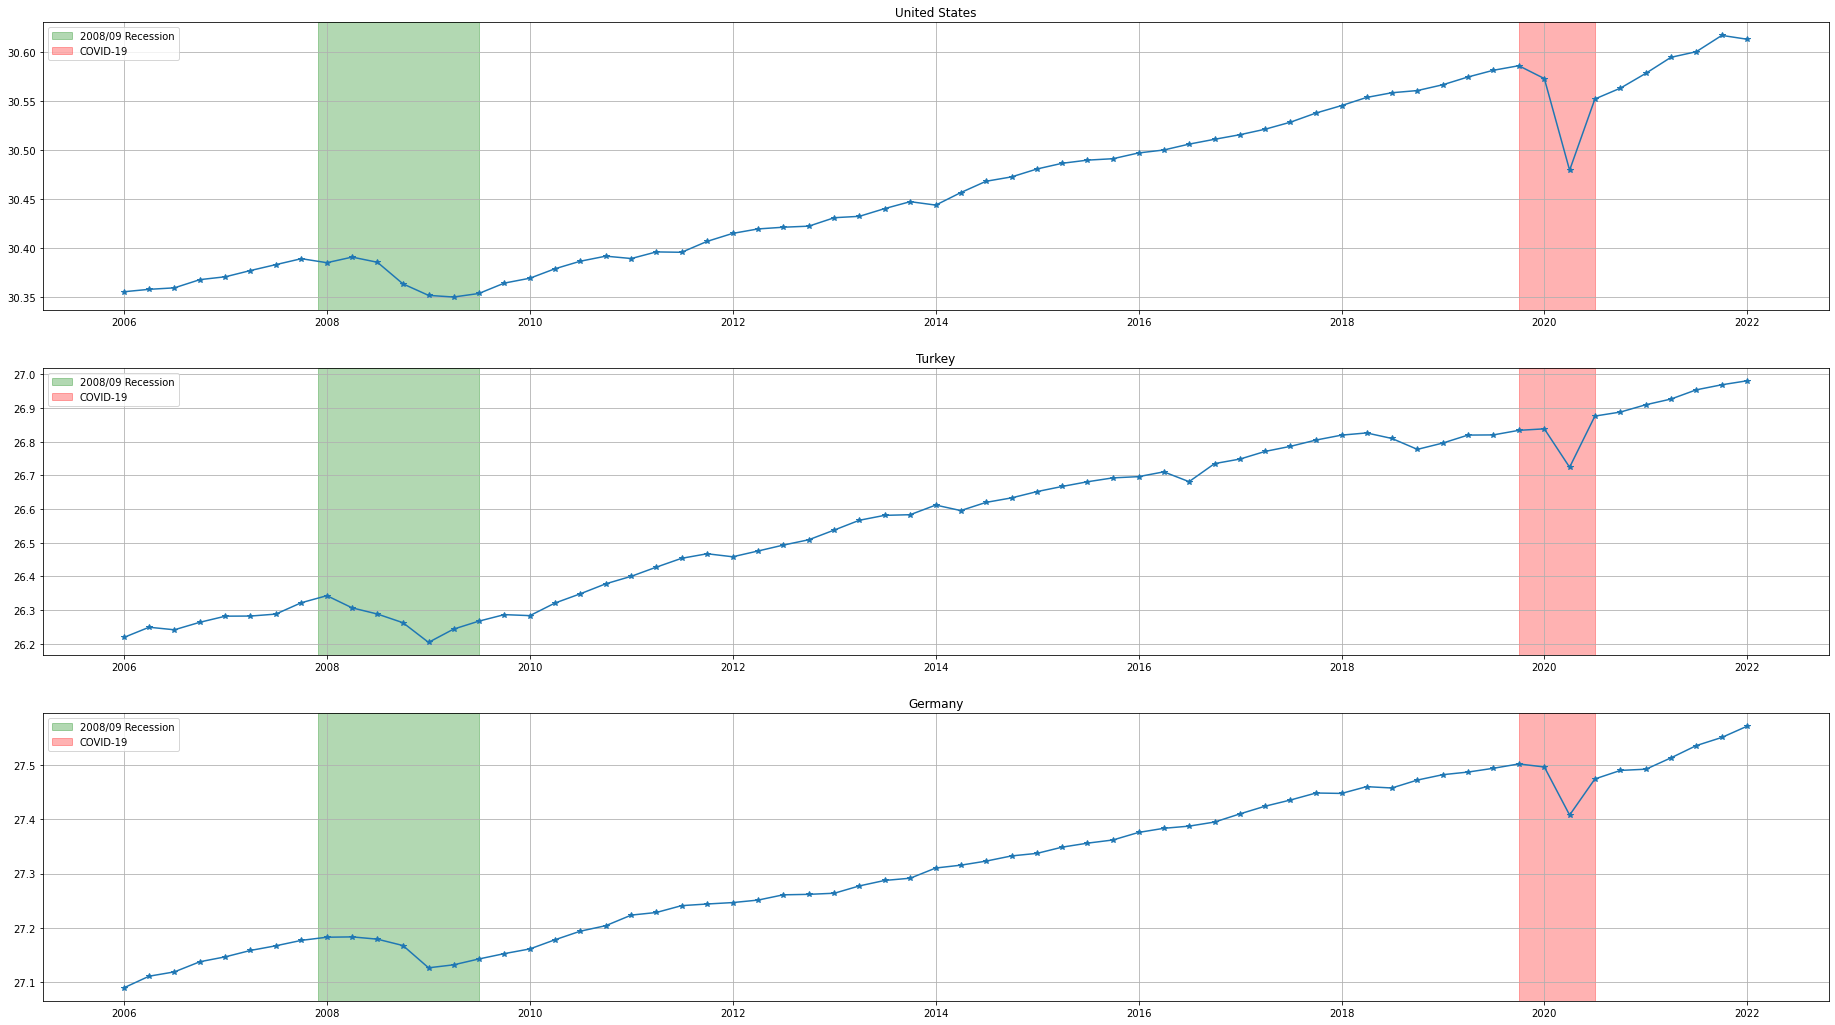

In [13]:
fig, axes = plt.subplots(nrows= 3, ncols= 1, figsize=(32,18))

start_crisis = dt.datetime(2007,12,1)
end_crisis = dt.date(2009,7,1)

start_covid = dt.datetime(2019,10,1)
end_covid = dt.date(2020,7,1)
#----------------------------------------------
axes[0].plot(gdp_us['gdp_log_us'],marker='*')
axes[0].set_title('United States')
axes[0].grid(True)

if start_crisis >= start and end_crisis <= end:
    axes[0].axvspan(start_crisis, end_crisis, 
           label="2008/09 Recession",color="green", alpha=0.3)
    
if start_covid >= start and end_covid <= end:
    axes[0].axvspan(start_covid, end_covid, 
           label="COVID-19",color="red", alpha=0.3)

axes[0].legend()
#----------------------------------------------
axes[1].plot(gdp_tur['gdp_log_tur'],marker='*')
axes[1].set_title('Turkey')
axes[1].grid(True)

if start_crisis >= start and end_crisis <= end:
    axes[1].axvspan(start_crisis, end_crisis, 
           label="2008/09 Recession",color="green", alpha=0.3)

if start_covid >= start and end_covid <= end:
    axes[1].axvspan(start_covid, end_covid, 
           label="COVID-19",color="red", alpha=0.3)

axes[1].legend()
#------------------------------------------------
axes[2].plot(gdp_ger['gdp_log_ger'],marker='*')
axes[2].set_title('Germany')
axes[2].grid(True)

if start_crisis >= start and end_crisis <= end:
    axes[2].axvspan(start_crisis, end_crisis, 
           label="2008/09 Recession",color="green", alpha=0.3)

if start_covid >= start and end_covid <= end:
    axes[2].axvspan(start_covid, end_covid, 
           label="COVID-19",color="red", alpha=0.3)

axes[2].legend();

Highlighted the 2008 financial crises in green color and Covid-19 in red on the diagram 
to indicate a significant recession of the year

## Extract the business cycle component from a level series

In [14]:
cycle, trend = sm.tsa.filters.hpfilter(df_result['gdp_log_us'],1600)
df_decomp_us = df_result[['gdp_log_us']]
df_decomp_us['us_cycle'] = cycle
df_decomp_us['us_trend'] = trend

In [15]:
df_decomp_us.info()
df_decomp_us.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2006-01-01 to 2022-01-01
Freq: QS-JAN
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_log_us  65 non-null     float64
 1   us_cycle    65 non-null     float64
 2   us_trend    65 non-null     float64
dtypes: float64(3)
memory usage: 4.1 KB


,gdp_log_us,us_cycle,us_trend
DATE,,,
2021-01-01,30.578385,-0.006685,30.585070
2021-04-01,30.594659,0.005429,30.589231
2021-07-01,30.600353,0.006911,30.593441
2021-10-01,30.617021,0.019343,30.597678
2022-01-01,30.613056,0.011135,30.601921


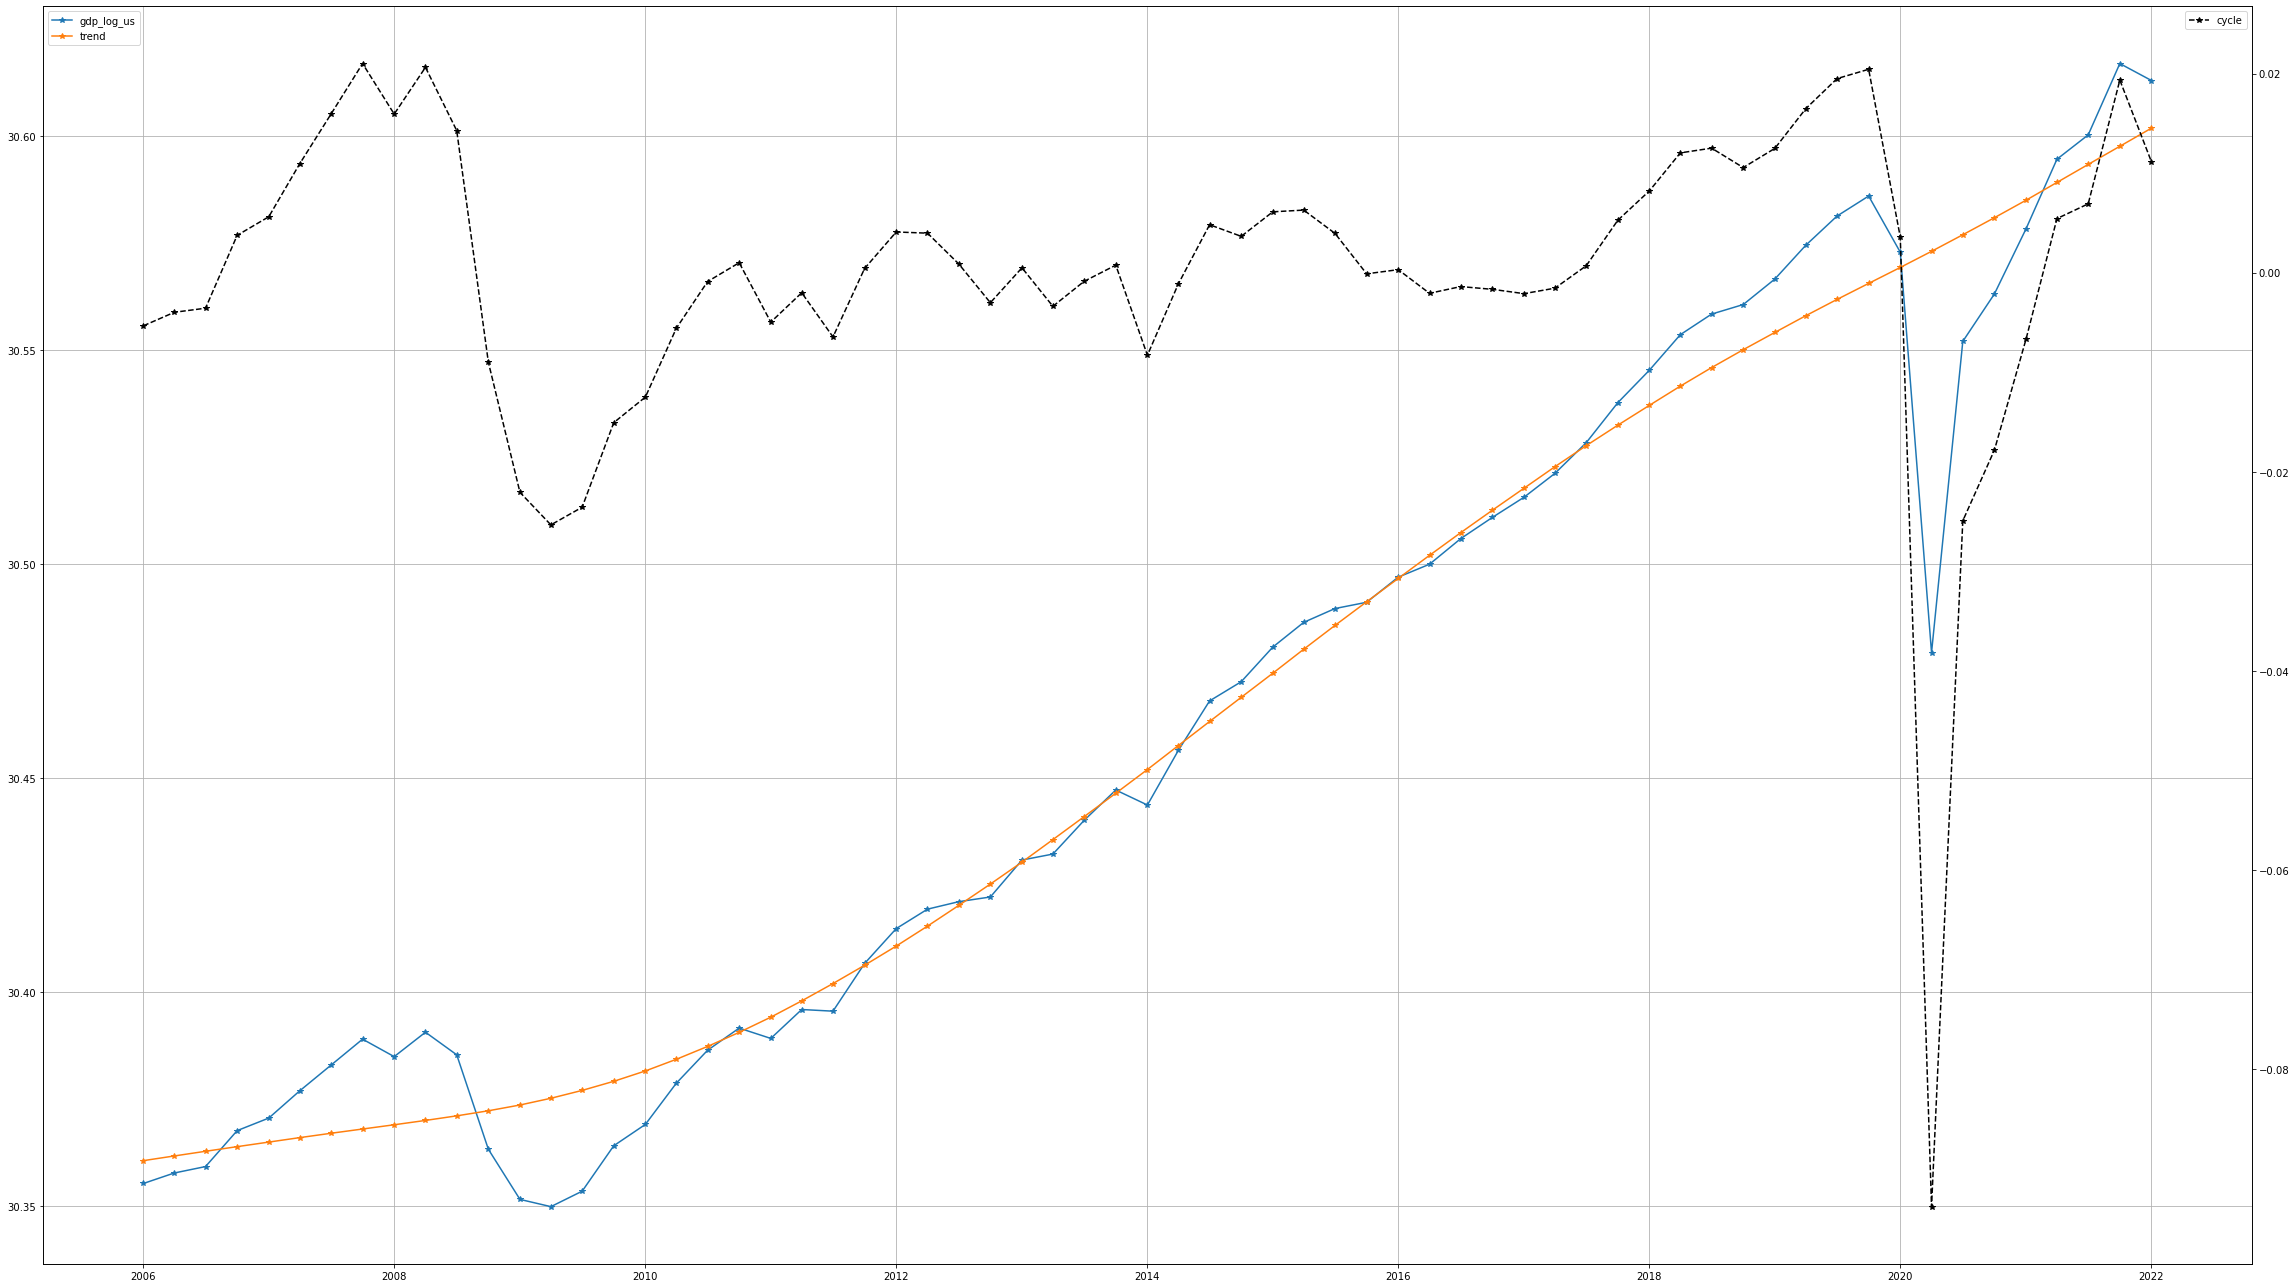

In [16]:
fig, ax = plt.subplots(figsize=(32,18))
ax.plot(df_decomp_us['gdp_log_us'],label='gdp_log_us',marker='*')
ax.plot(df_decomp_us['us_trend'],label='trend',marker='*')
ax.legend(loc=2)
ax.grid(True)
ax2=ax.twinx()
ax2.plot(df_decomp_us['us_cycle'], color='black',linestyle='dashed',label='cycle',marker='*')
ax2.legend()
fig.tight_layout()
plt.show()

In [17]:
cycle, trend = sm.tsa.filters.hpfilter(df_result['gdp_log_tur'],1600)
df_decomp_tur = df_result[['gdp_log_tur']]
df_decomp_tur['tur_cycle'] = cycle
df_decomp_tur['tur_trend'] = trend

In [18]:
df_decomp_tur.info()
df_decomp_tur.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2006-01-01 to 2022-01-01
Freq: QS-JAN
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gdp_log_tur  65 non-null     float64
 1   tur_cycle    65 non-null     float64
 2   tur_trend    65 non-null     float64
dtypes: float64(3)
memory usage: 4.1 KB


,gdp_log_tur,tur_cycle,tur_trend
DATE,,,
2021-01-01,26.909615,0.006969,26.902646
2021-04-01,26.926354,0.012025,26.914329
2021-07-01,26.953716,0.027591,26.926126
2021-10-01,26.968713,0.030733,26.937980
2022-01-01,26.980648,0.030794,26.949853


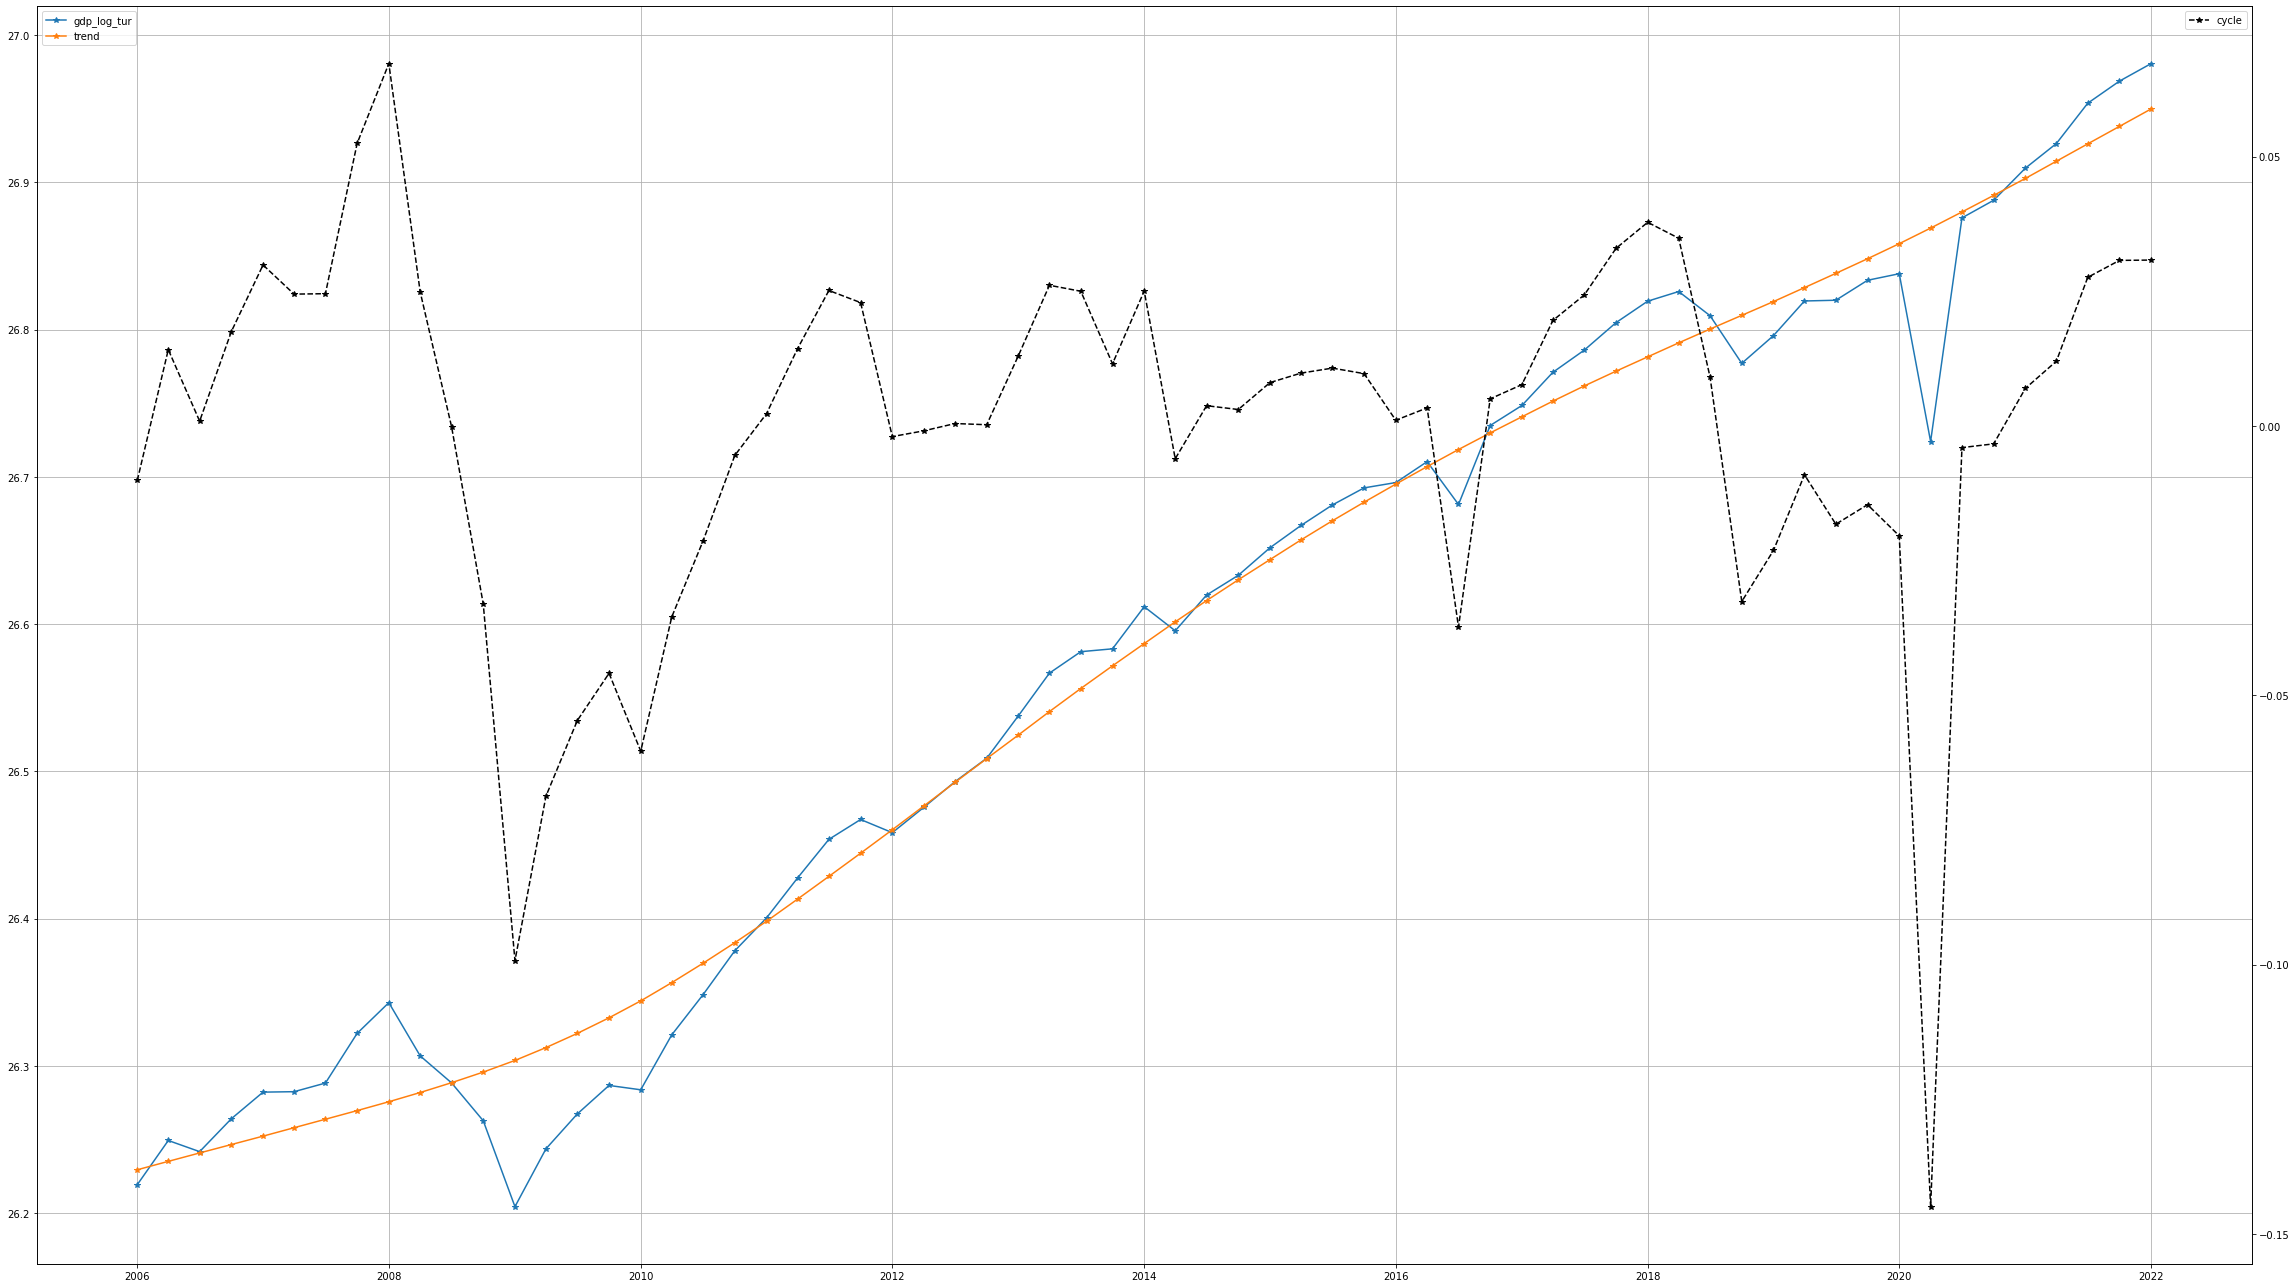

In [19]:
fig, ax = plt.subplots(figsize=(32,18))
ax.plot(df_decomp_tur['gdp_log_tur'], label='gdp_log_tur',marker='*')
ax.plot(df_decomp_tur['tur_trend'], label='trend',marker='*')
ax.legend(loc=2)
ax.grid(True)
ax2=ax.twinx()
ax2.plot(df_decomp_tur['tur_cycle'], color='black',label = 'cycle',linestyle='dashed',marker='*')
ax2.legend()
fig.tight_layout()
plt.show()

In [20]:
cycle, trend = sm.tsa.filters.hpfilter(df_result['gdp_log_ger'],1600)
df_decomp_ger = df_result[['gdp_log_ger']]
df_decomp_ger['ger_cycle'] = cycle
df_decomp_ger['ger_trend'] = trend

In [21]:
df_decomp_ger.info()
df_decomp_ger.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2006-01-01 to 2022-01-01
Freq: QS-JAN
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gdp_log_ger  65 non-null     float64
 1   ger_cycle    65 non-null     float64
 2   ger_trend    65 non-null     float64
dtypes: float64(3)
memory usage: 4.1 KB


,gdp_log_ger,ger_cycle,ger_trend
DATE,,,
2021-01-01,27.492589,-0.022811,27.515400
2021-04-01,27.513501,-0.008469,27.521970
2021-07-01,27.536085,0.007464,27.528621
2021-10-01,27.551154,0.015835,27.535319
2022-01-01,27.572073,0.030037,27.542037


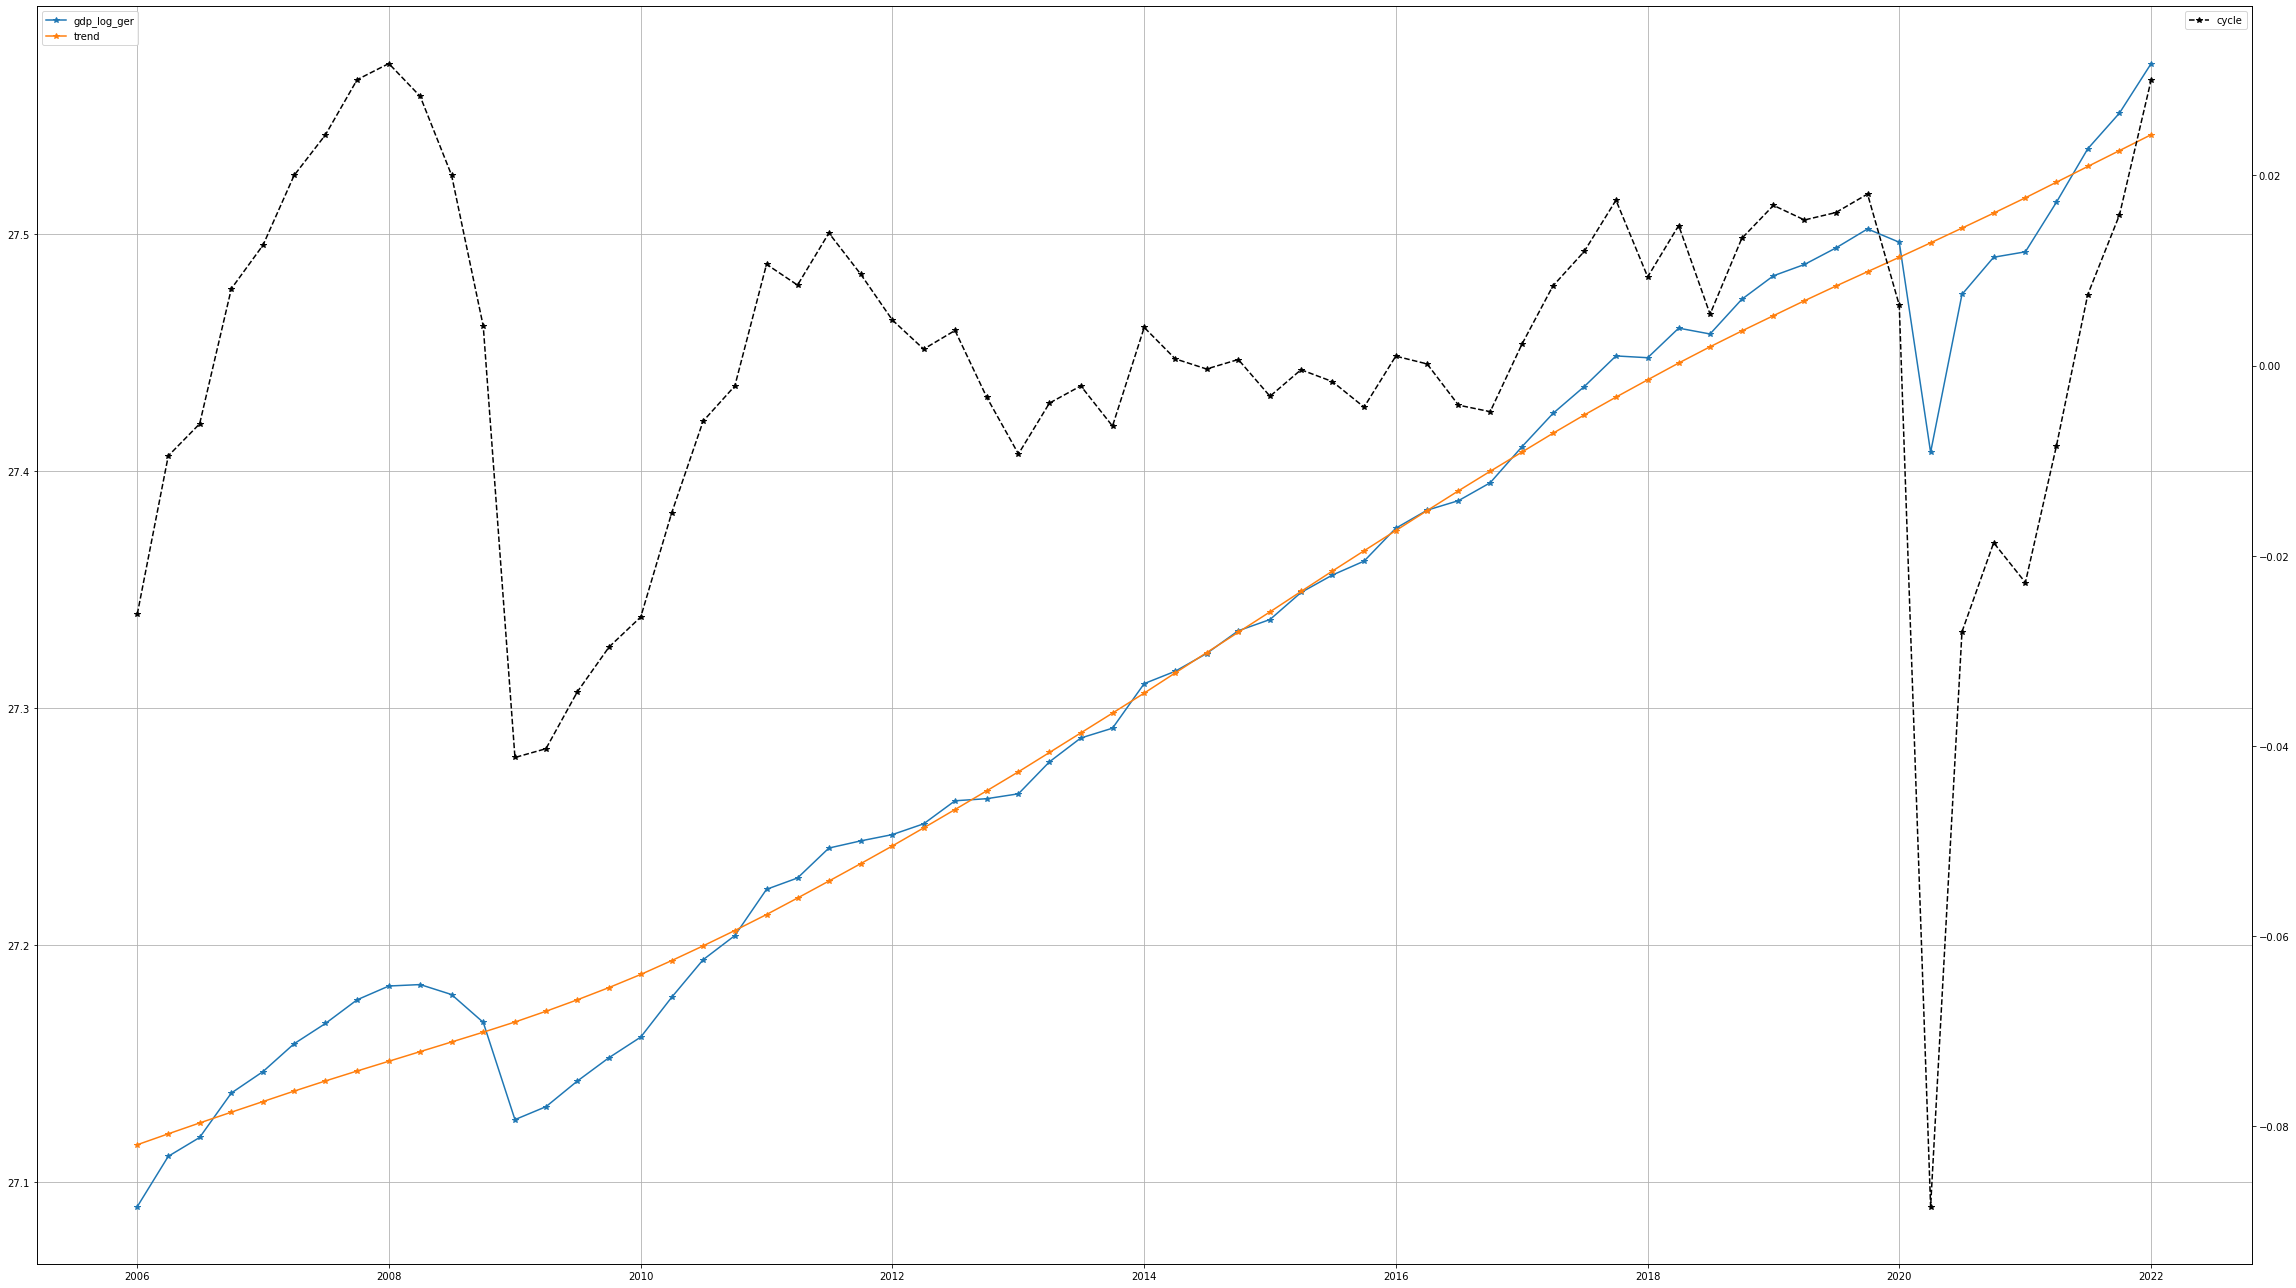

In [22]:
fig, ax = plt.subplots(figsize=(32,18))
ax.plot(df_decomp_ger['gdp_log_ger'],label='gdp_log_ger',marker='*')
ax.plot(df_decomp_ger['ger_trend'], label='trend',marker='*')
ax.legend(loc=2)
ax.grid(True)
ax2=ax.twinx()
ax2.plot(df_decomp_ger['ger_cycle'], color='black',linestyle='dashed',label='cycle',marker='*')
ax2.legend()
fig.tight_layout()
plt.show()

## Import private consumption and private investment data

In [23]:
df_i_us = fred.get_series('GPDIC1' , observation_start=start, observation_end=end)
df_c_us = fred.get_series('PCECC96' , observation_start=start, observation_end=end)

real_i_us = pd.DataFrame(df_i_us, columns=['GPDIC1'])*1e09 
real_c_us = pd.DataFrame(df_c_us, columns = ['PCECC96'])*1e09 

real_i_us.index.freq = 'QS'
real_c_us.index.freq = 'QS'

real_i_us.rename(columns={"GPDIC1":"Investment_us"}, inplace=True)
real_c_us.rename(columns={"PCECC96":"Consumption_us"},inplace=True)
#-------------------------
df_i_tur= fred.get_series('NAEXKP04TRQ652S' , observation_start=start, observation_end=end)
df_c_tur = fred.get_series('NAEXKP02TRQ189S' , observation_start=start, observation_end=end)

real_i_tur = pd.DataFrame(df_i_tur, columns=['NAEXKP04TRQ652S']) 
real_c_tur = pd.DataFrame(df_c_tur, columns = ['NAEXKP02TRQ189S'])

real_i_tur.index.freq = 'QS'
real_c_tur.index.freq = 'QS'

real_i_tur.rename(columns={"NAEXKP04TRQ652S":"Investment_tur"}, inplace=True)
real_c_tur.rename(columns={"NAEXKP02TRQ189S":"Consumption_tur"},inplace=True) 
#--------------------------
df_i_ger= fred.get_series('DEUGFCFQDSMEI' , observation_start=start, observation_end=end)
df_c_ger = fred.get_series('DEUPFCEQDSMEI' , observation_start=start, observation_end=end)

real_i_ger = pd.DataFrame(df_i_ger, columns=['DEUGFCFQDSMEI']) 
real_c_ger = pd.DataFrame(df_c_ger, columns = ['DEUPFCEQDSMEI'])

real_i_ger.index.freq = 'QS'
real_c_ger.index.freq = 'QS'

real_i_ger.rename(columns={"DEUGFCFQDSMEI":"Investment_ger"}, inplace=True)
real_c_ger.rename(columns={"DEUPFCEQDSMEI":"Consumption_ger"},inplace=True)

In [24]:
print(real_i_us.tail(),
      '\n',real_c_us.tail(),
      '\n',real_i_tur.tail(),
      '\n',real_c_tur.tail(),
      '\n',real_i_ger.tail(),
      '\n',real_c_ger.tail()
     )

            Investment_us
2021-01-01   3.541305e+12
2021-04-01   3.506014e+12
2021-07-01   3.609693e+12
2021-10-01   3.903047e+12
2022-01-01   3.951071e+12 
             Consumption_us
2021-01-01    1.328268e+13
2021-04-01    1.366561e+13
2021-07-01    1.373241e+13
2021-10-01    1.381836e+13
2022-01-01    1.388111e+13 
             Investment_tur
2021-01-01    1.264965e+11
2021-04-01    1.268805e+11
2021-07-01    1.245828e+11
2021-10-01    1.233056e+11
2022-01-01    1.257172e+11 
             Consumption_tur
2021-01-01     2.850621e+11
2021-04-01     2.924152e+11
2021-07-01     3.164392e+11
2021-10-01     3.461687e+11
2022-01-01     3.364232e+11 
             Investment_ger
2021-01-01    1.889050e+11
2021-04-01    1.949750e+11
2021-07-01    1.950500e+11
2021-10-01    1.980000e+11
2022-01-01    2.082960e+11 
             Consumption_ger
2021-01-01     4.128000e+11
2021-04-01     4.302510e+11
2021-07-01     4.607180e+11
2021-10-01     4.603510e+11
2022-01-01     4.716810e+11


## Take natural log on Investment & Consumption

In [25]:
real_i_us['Investment_log_us']=np.log(real_i_us['Investment_us'])
real_c_us['Consumption_log_us']=np.log(real_c_us['Consumption_us'])
#---------------------------
real_i_tur['Investment_log_tur']=np.log(real_i_tur['Investment_tur'])
real_c_tur['Consumption_log_tur']=np.log(real_c_tur['Consumption_tur'])
#----------------------------
real_i_ger['Investment_log_ger']=np.log(real_i_ger['Investment_ger'])
real_c_ger['Consumption_log_ger']=np.log(real_c_ger['Consumption_ger'])

## Apply HP filter on Investment & Consumption

In [26]:
# HP filter
# https://www.oecd-ilibrary.org/sites/361fabc3-en/index.html?itemId=/content/component/361fabc3-en

cycle, trend = sm.tsa.filters.hpfilter(real_i_us['Investment_log_us'],1600)
decomp_invest_us = real_i_us[['Investment_log_us']]
decomp_invest_us['us_invest_cycle'] = cycle
decomp_invest_us['us_invest_trend'] = trend

cycle, trend = sm.tsa.filters.hpfilter(real_c_us['Consumption_log_us'],1600)
decomp_consump_us = real_c_us[['Consumption_log_us']]
decomp_consump_us['us_consump_cycle'] = cycle
decomp_consump_us['us_consump_trend'] = trend

#-------------------------------------------------
cycle, trend = sm.tsa.filters.hpfilter(real_i_tur['Investment_log_tur'],1600)
decomp_invest_tur = real_i_tur[['Investment_log_tur']]
decomp_invest_tur['tur_invest_cycle'] = cycle
decomp_invest_tur['tur_invest_trend'] = trend

cycle, trend = sm.tsa.filters.hpfilter(real_c_tur['Consumption_log_tur'],1600)
decomp_consump_tur = real_c_tur[['Consumption_log_tur']]
decomp_consump_tur['tur_consump_cycle'] = cycle
decomp_consump_tur['tur_consump_trend'] = trend

#-------------------------------------------------
cycle, trend = sm.tsa.filters.hpfilter(real_i_ger['Investment_log_ger'],1600)
decomp_invest_ger = real_i_ger[['Investment_log_ger']]
decomp_invest_ger['ger_invest_cycle'] = cycle
decomp_invest_ger['ger_invest_trend'] = trend

cycle, trend = sm.tsa.filters.hpfilter(real_c_ger['Consumption_log_ger'],1600)
decomp_consump_ger = real_c_ger[['Consumption_log_ger']]
decomp_consump_ger['ger_consump_cycle'] = cycle
decomp_consump_ger['ger_consump_trend'] = trend


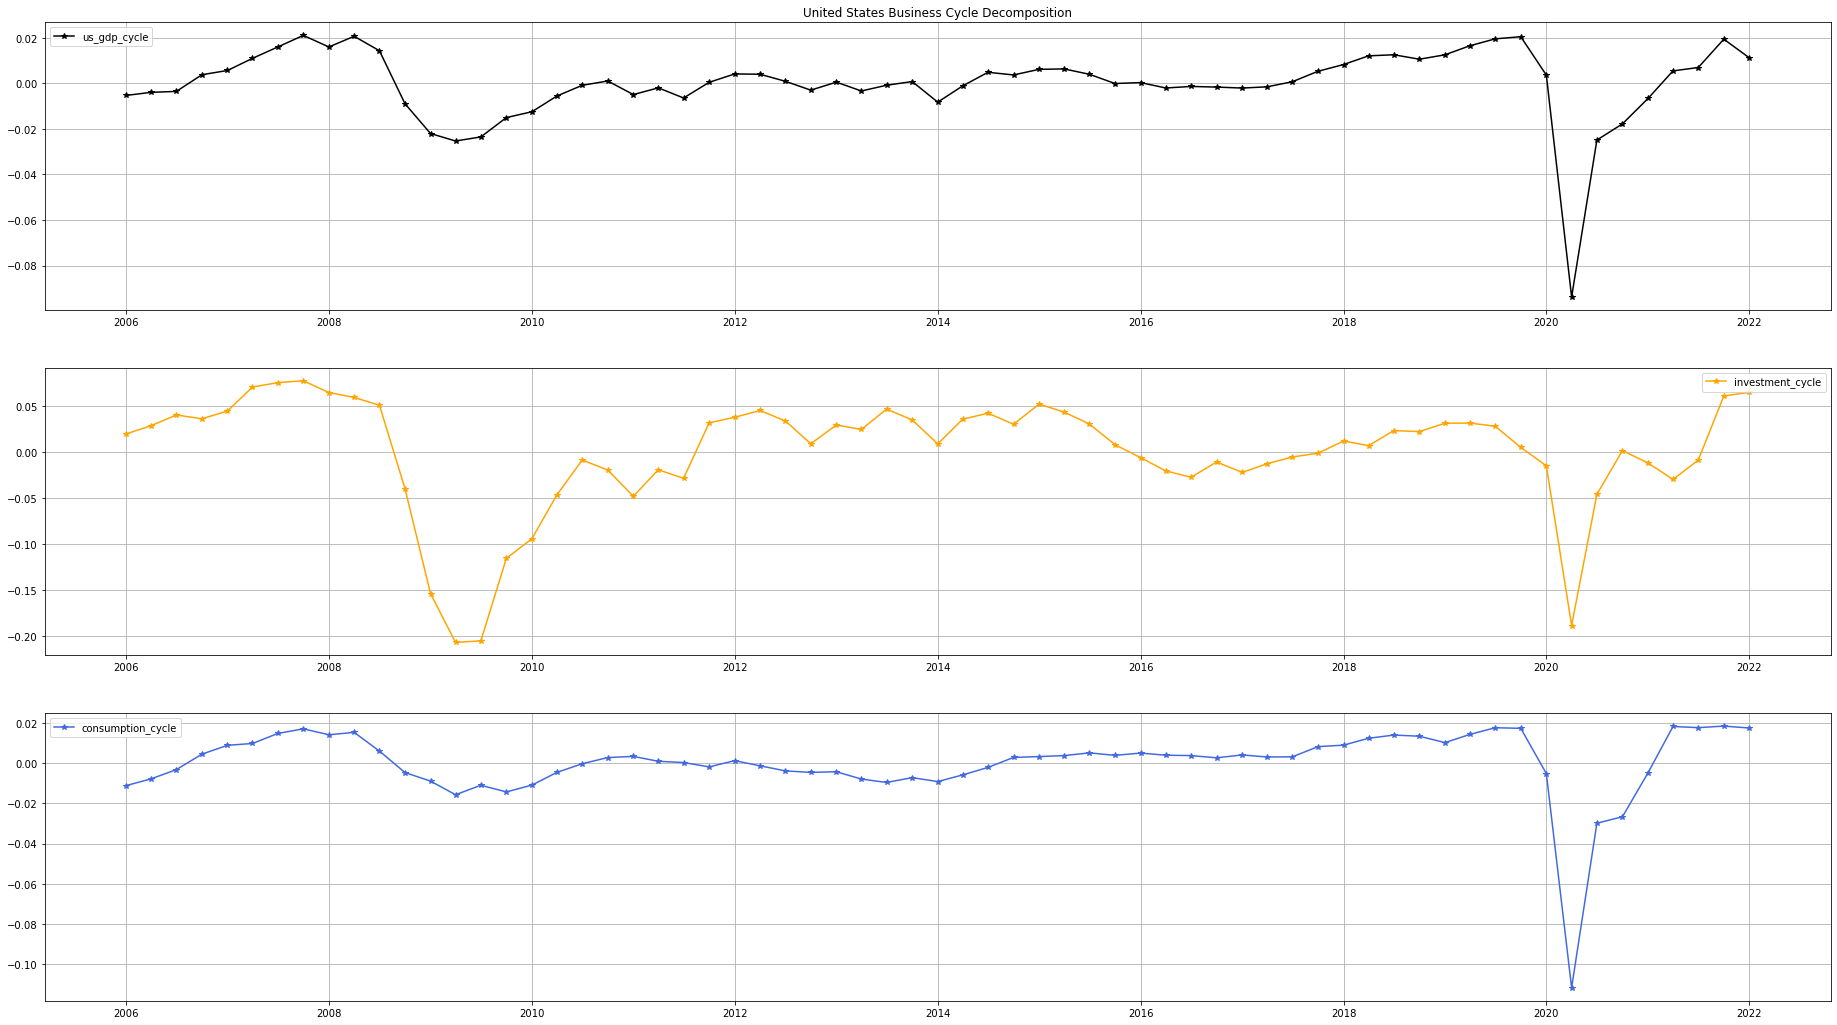

In [27]:
fig, axes = plt.subplots(nrows=3, ncols= 1, figsize=(32,18))
axes[0].set_title('United States Business Cycle Decomposition')
axes[2].plot(decomp_consump_us['us_consump_cycle'],label='consumption_cycle',color='royalblue',marker='*')
axes[2].legend()
axes[2].grid(True)
axes[1].plot(decomp_invest_us['us_invest_cycle'],label='investment_cycle',color='orange',marker='*')
axes[1].legend()
axes[1].grid(True)
axes[0].plot(df_decomp_us['us_cycle'],label='us_gdp_cycle',color='black',marker='*')
axes[0].legend()
axes[0].grid(True);

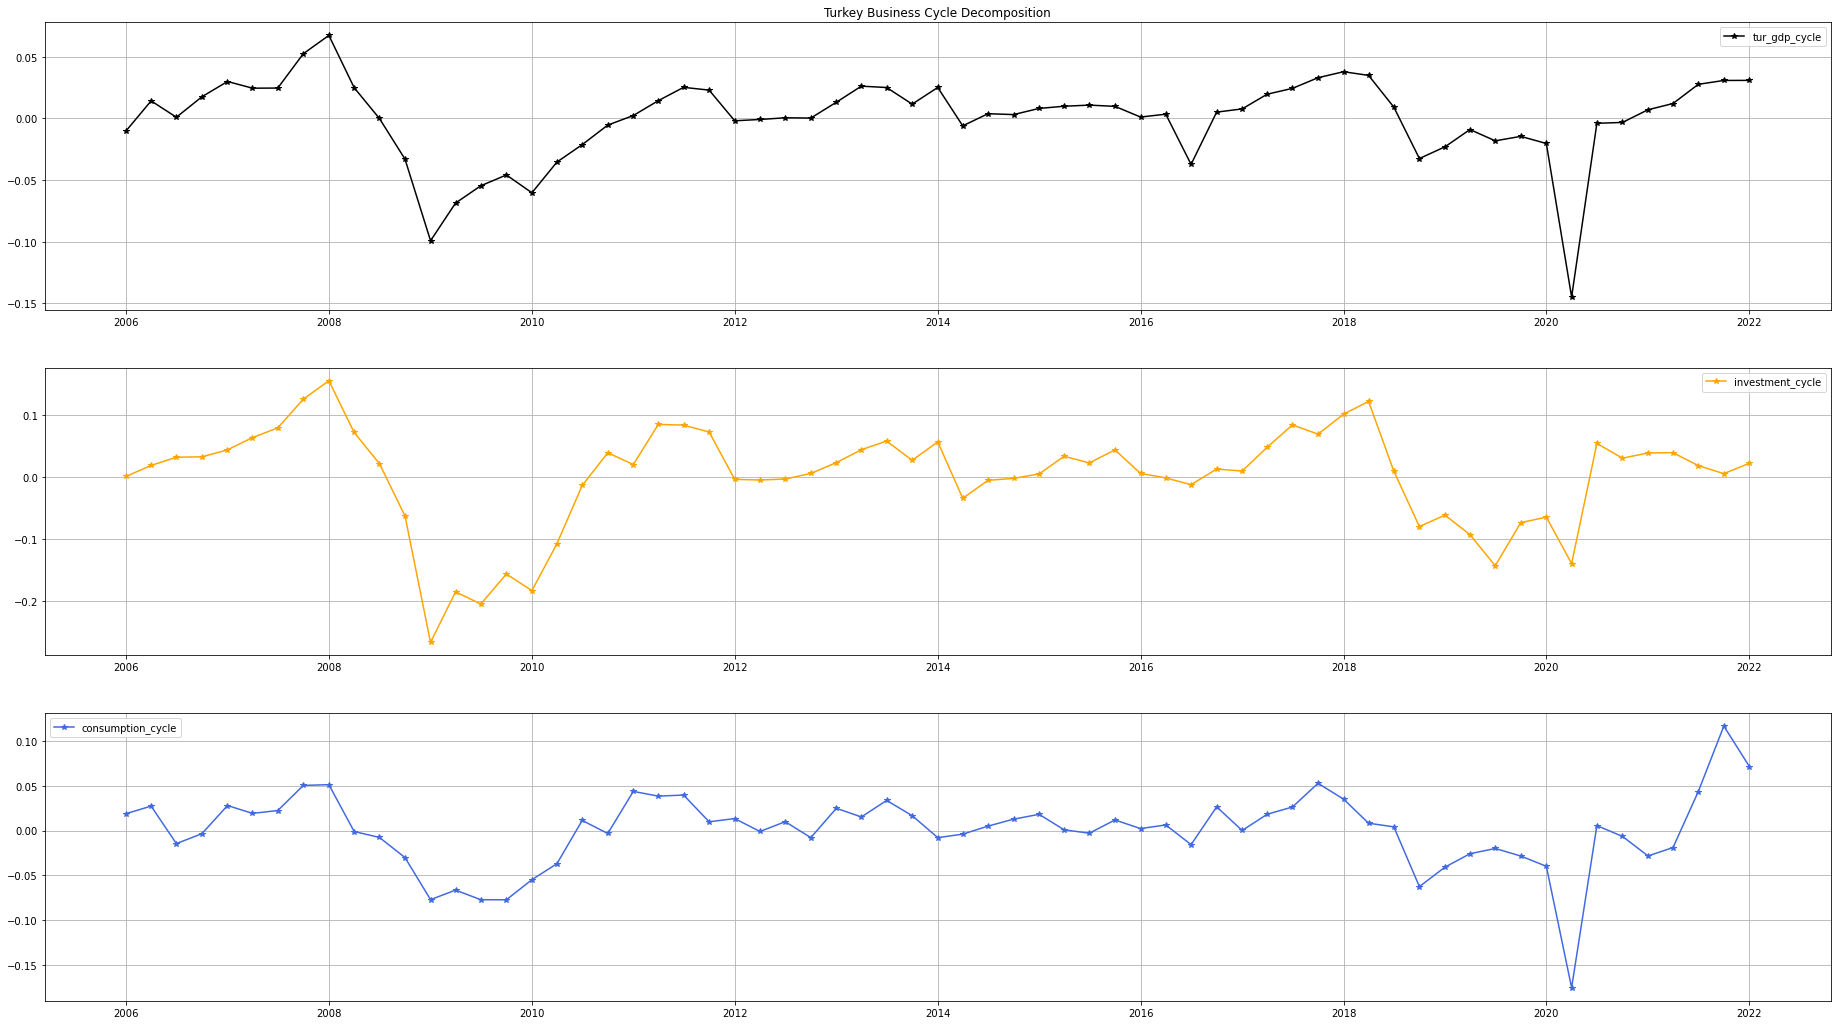

In [28]:
fig, axes = plt.subplots(nrows=3, ncols= 1, figsize=(32,18))
axes[0].set_title('Turkey Business Cycle Decomposition')
axes[2].plot(decomp_consump_tur['tur_consump_cycle'],label='consumption_cycle',color='royalblue',marker='*')
axes[2].legend()
axes[2].grid()
axes[1].plot(decomp_invest_tur['tur_invest_cycle'],label='investment_cycle',color='orange',marker='*')
axes[1].legend()
axes[1].grid()
axes[0].plot(df_decomp_tur['tur_cycle'],label='tur_gdp_cycle',color='black',marker='*')
axes[0].legend()
axes[0].grid(True);

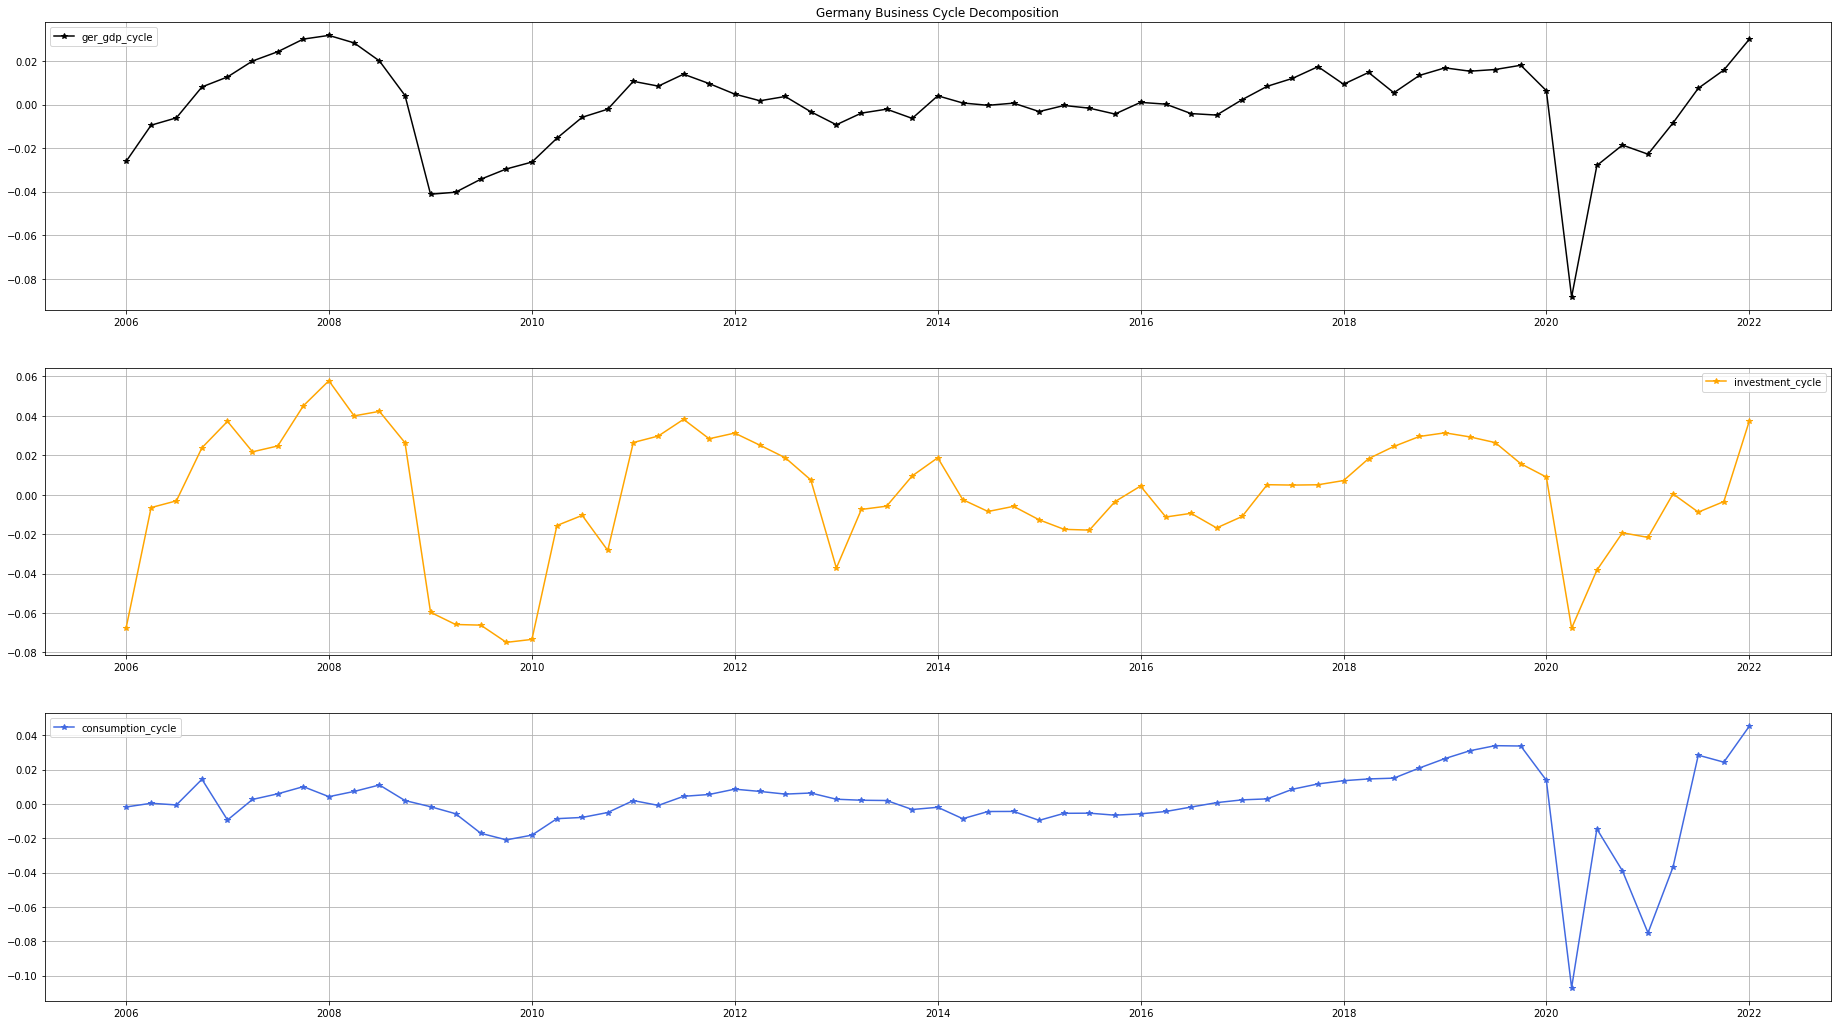

In [29]:
fig, axes = plt.subplots(nrows=3, ncols= 1, figsize=(32,18))
axes[0].set_title('Germany Business Cycle Decomposition')
axes[2].plot(decomp_consump_ger['ger_consump_cycle'],label='consumption_cycle',color='royalblue',marker='*')
axes[2].legend()
axes[2].grid(True)
axes[1].plot(decomp_invest_ger['ger_invest_cycle'],label='investment_cycle',color='orange',marker='*')
axes[1].legend()
axes[1].grid(True)
axes[0].plot(df_decomp_ger['ger_cycle'],label='ger_gdp_cycle',color='black',marker='*')
axes[0].legend()
axes[0].grid(True);

## Ratio of investment and consumption to GDP

In [30]:
median_i = (real_i_us['Investment_us']/gdp_us['gdp_us']).median()
median_c = (real_c_us['Consumption_us']/gdp_us['gdp_us']).median()
median_i_us = 'The median of private investment to GDP: {i}'.format(i=median_i)
median_c_us = 'The median of private consumption to GDP: {c}'.format(c=median_c)
print(median_i_us)
print(median_c_us)

The median of private investment to GDP: 0.17510363560955763
The median of private consumption to GDP: 0.6851796437888856


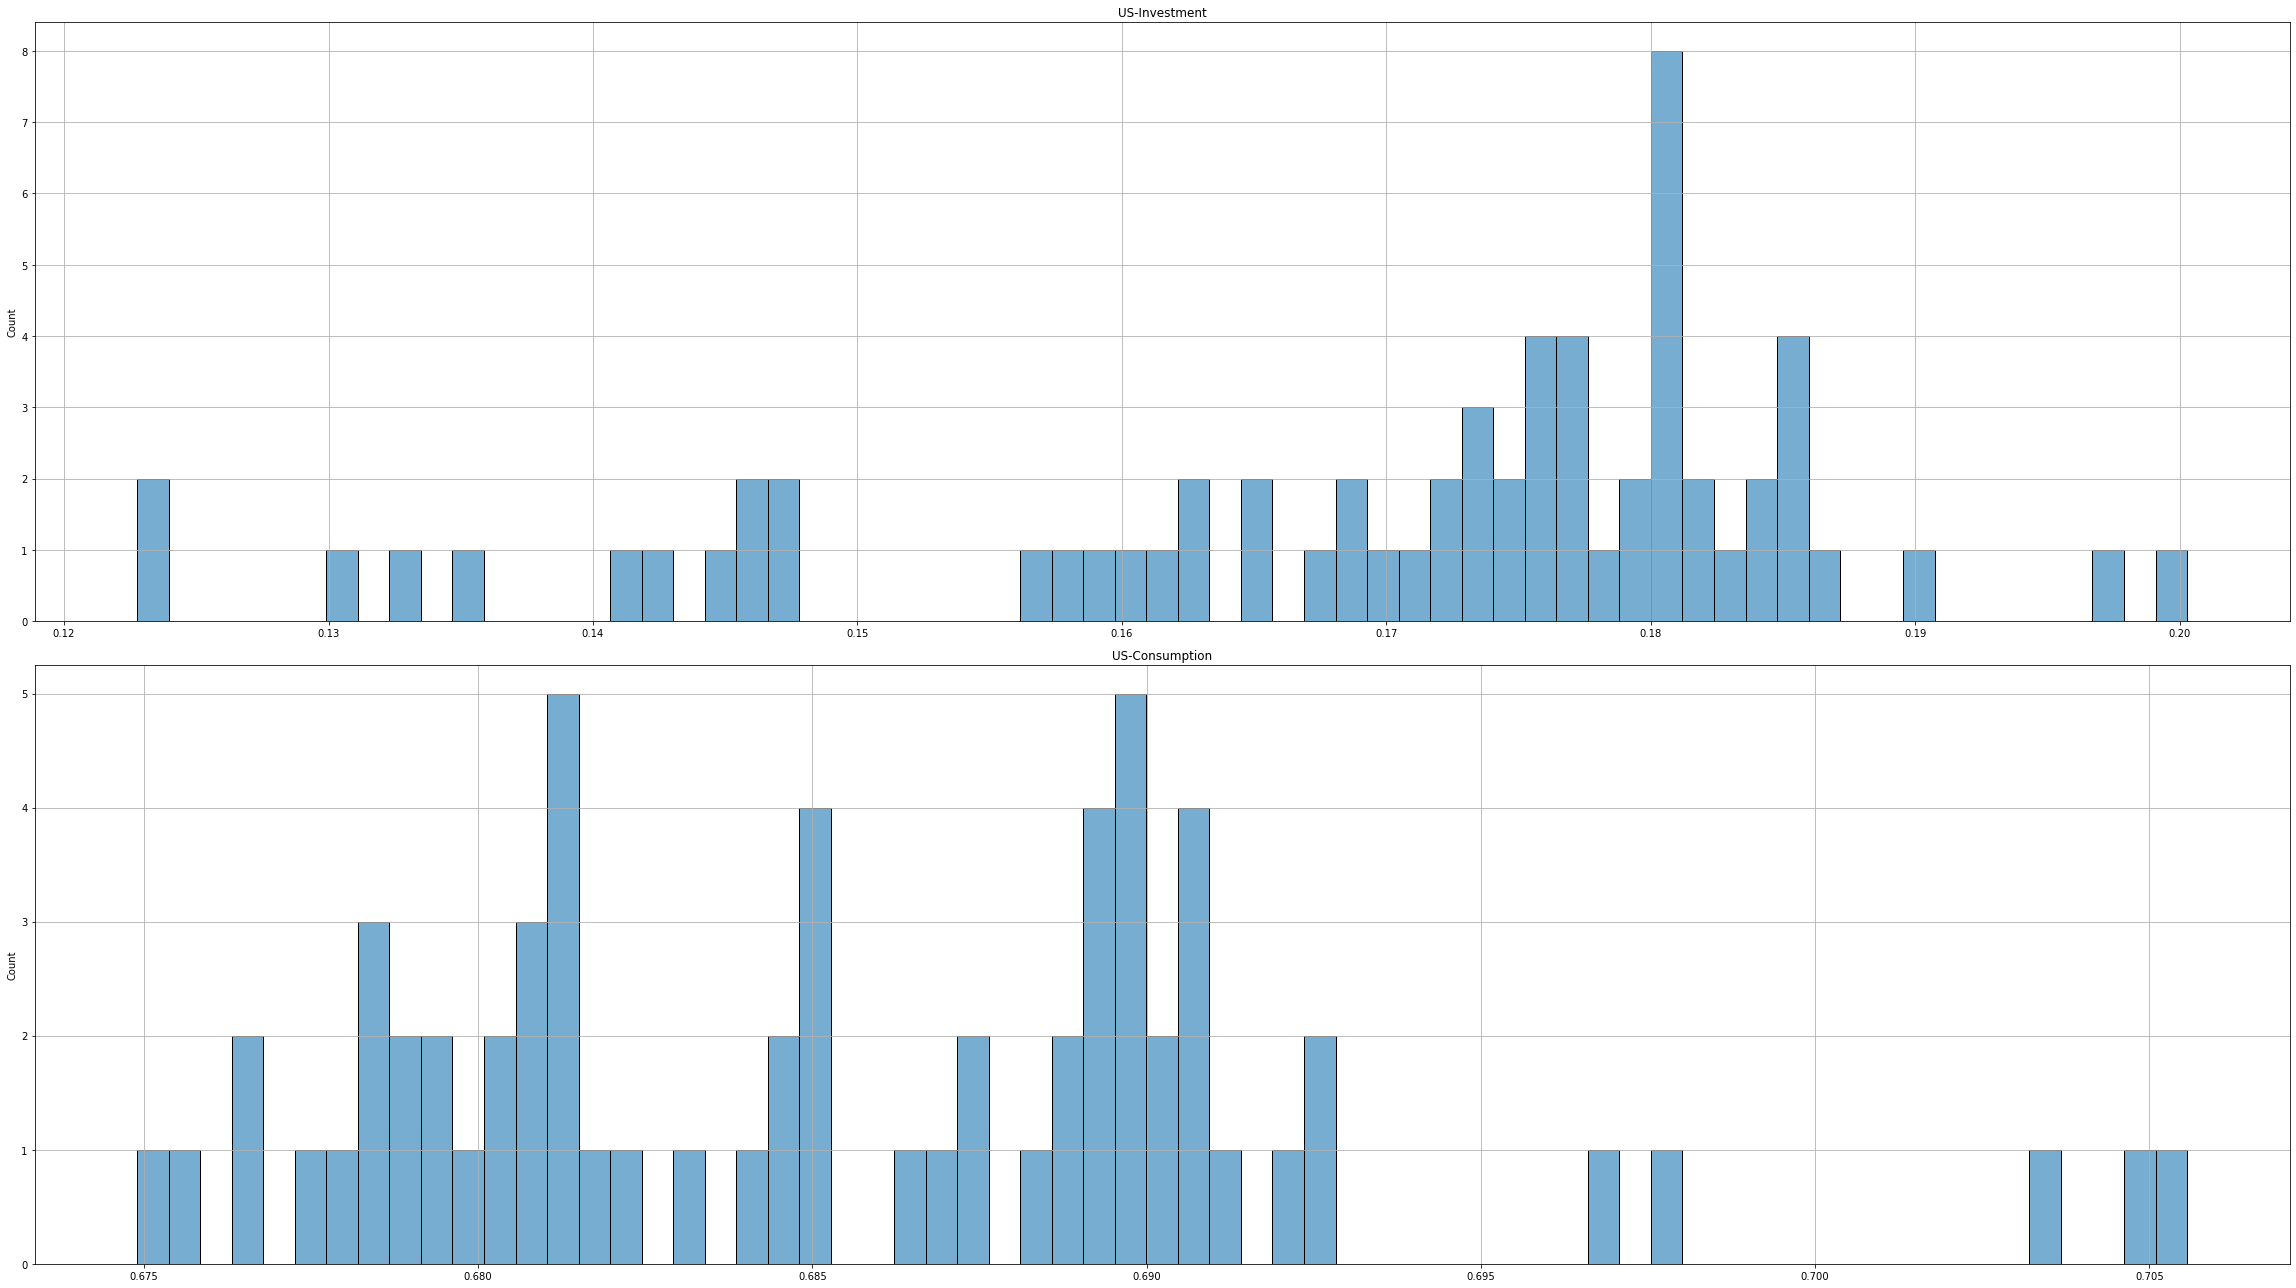

In [31]:
fig, axes = plt.subplots(nrows=2 , ncols=1, figsize=(32,18))
axes1 = sns.histplot(
    real_i_us['Investment_us']/gdp_us['gdp_us'],
    bins=df_result.shape[0],
    ax =axes[0],
    alpha=0.6,
)
axes1.set_title('US-Investment')
axes1.grid(True)
axes2 = sns.histplot(
    real_c_us['Consumption_us']/gdp_us['gdp_us'],
    bins=df_result.shape[0],
    ax=axes[1],
    alpha=0.6
)
axes2.set_title('US-Consumption')
axes2.grid(True)
fig.tight_layout();

In [32]:
median_i = (real_i_tur['Investment_tur']/gdp_tur['gdp_tur']).median()
median_c = (real_c_tur['Consumption_tur']/gdp_tur['gdp_tur']).median()
median_i_tur = 'The median of private investment to GDP: {i}'.format(i=median_i)
median_c_tur = 'The median of private consumption to GDP: {c}'.format(c=median_c)
print(median_i_tur)
print(median_c_tur)

The median of private investment to GDP: 0.2746823830727943
The median of private consumption to GDP: 0.6113486090199081


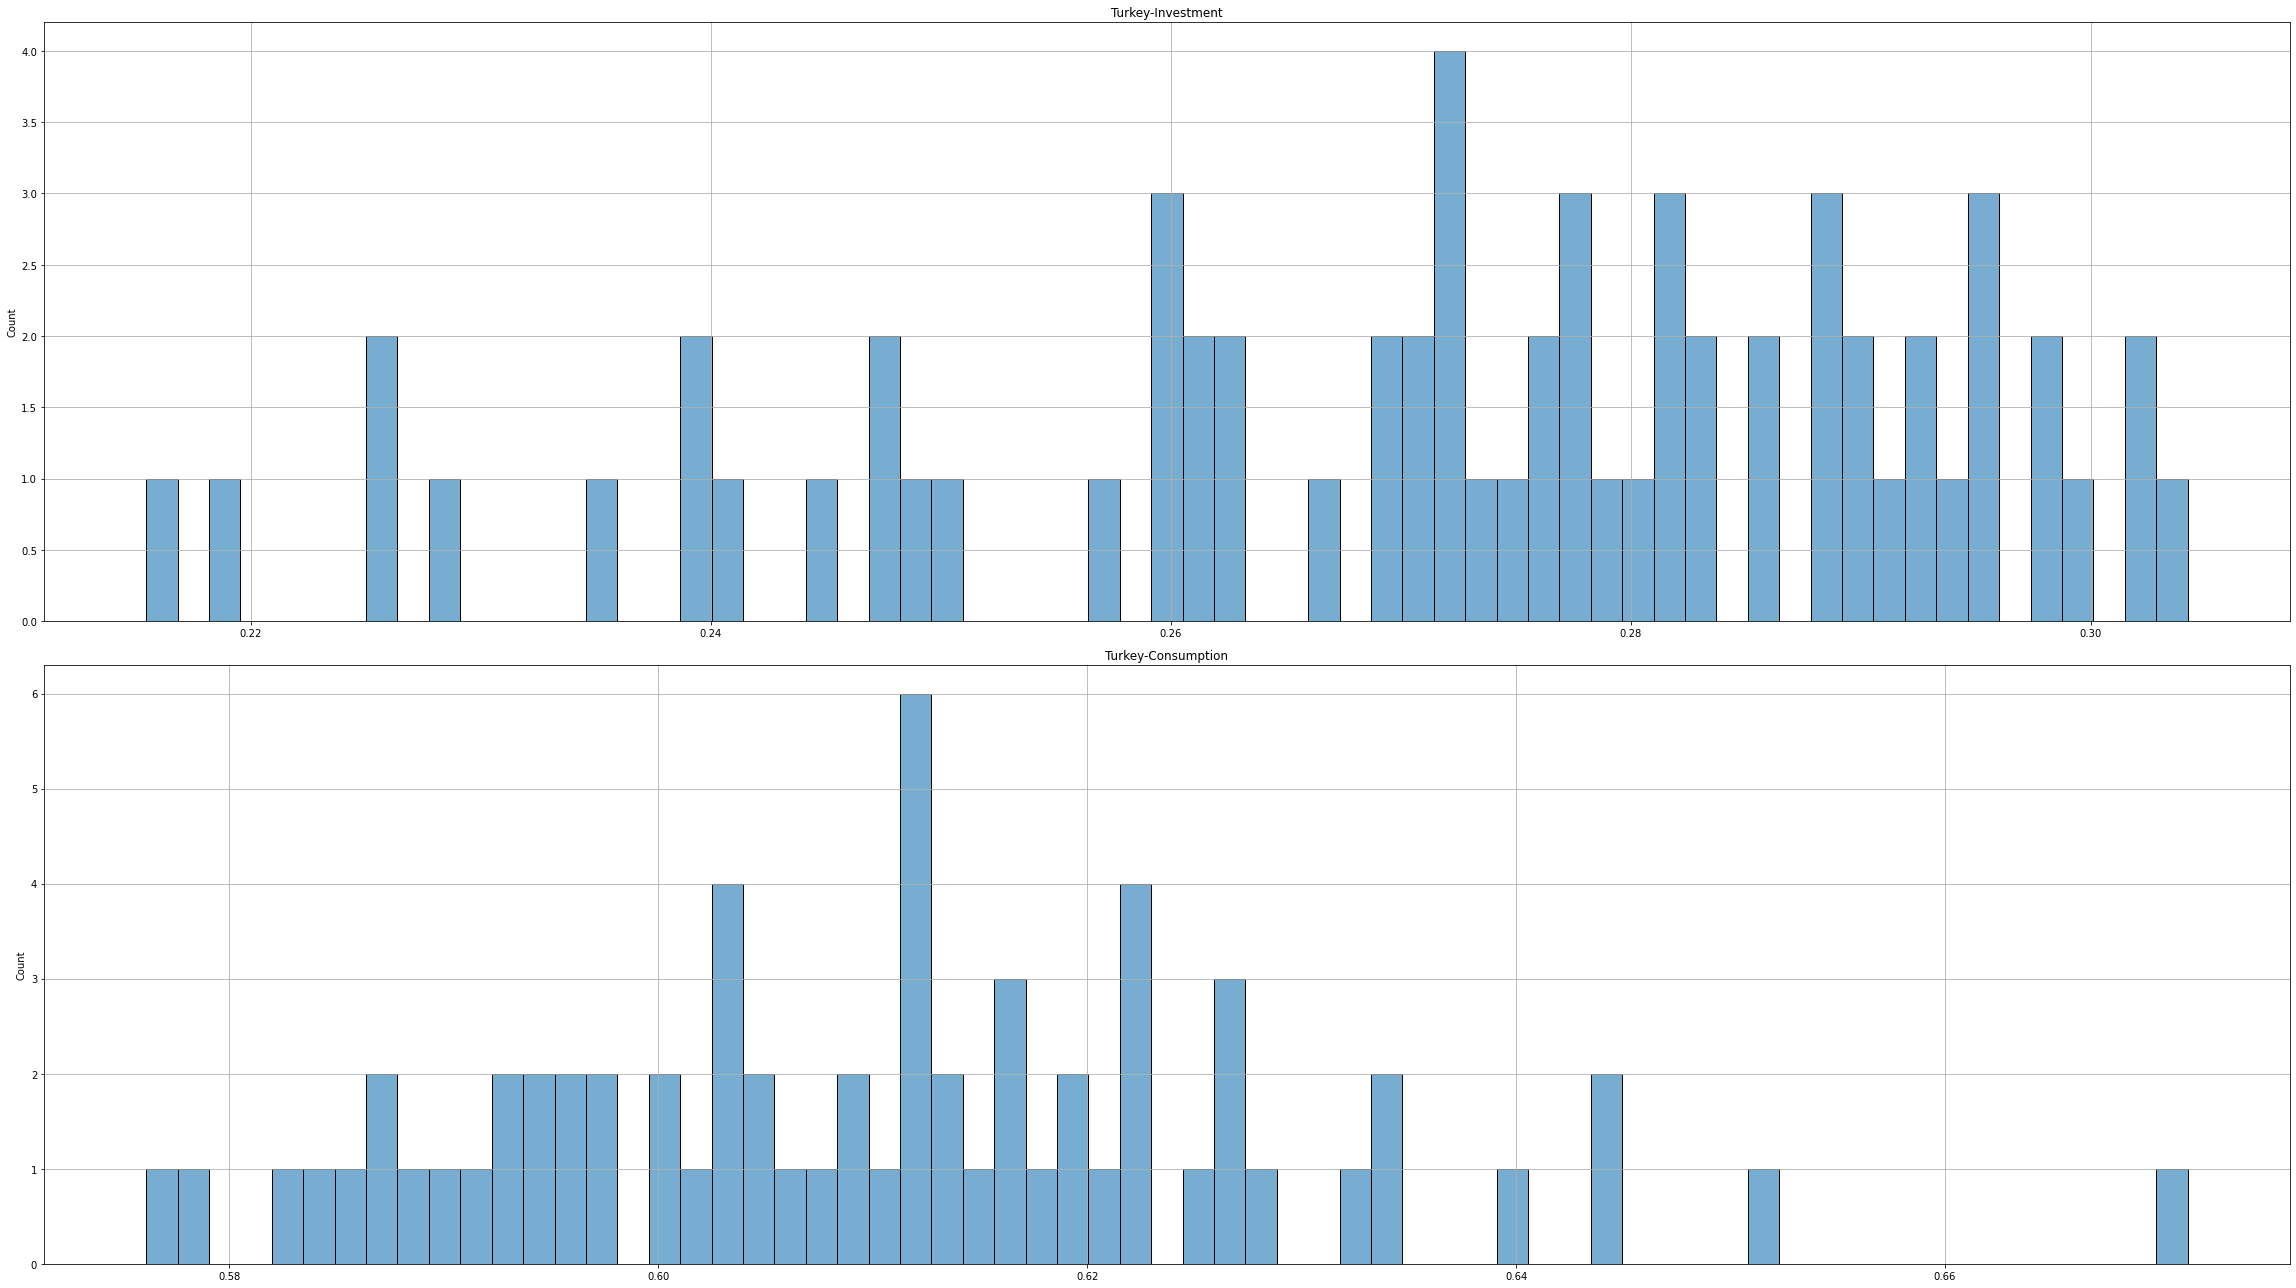

In [33]:
fig, axes = plt.subplots(nrows=2 , ncols=1, figsize=(32,18))
axes1 = sns.histplot(
    real_i_tur['Investment_tur']/gdp_tur['gdp_tur'],
    bins=df_result.shape[0]
    ,ax =axes[0],
    alpha=0.6)
axes1.set_title('Turkey-Investment')
axes1.grid(True)
axes2 = sns.histplot(
    real_c_tur['Consumption_tur']/gdp_tur['gdp_tur'],
    bins=df_result.shape[0],
    ax=axes[1],
    alpha=0.6
)
axes2.set_title('Turkey-Consumption')
axes2.grid(True)
fig.tight_layout()

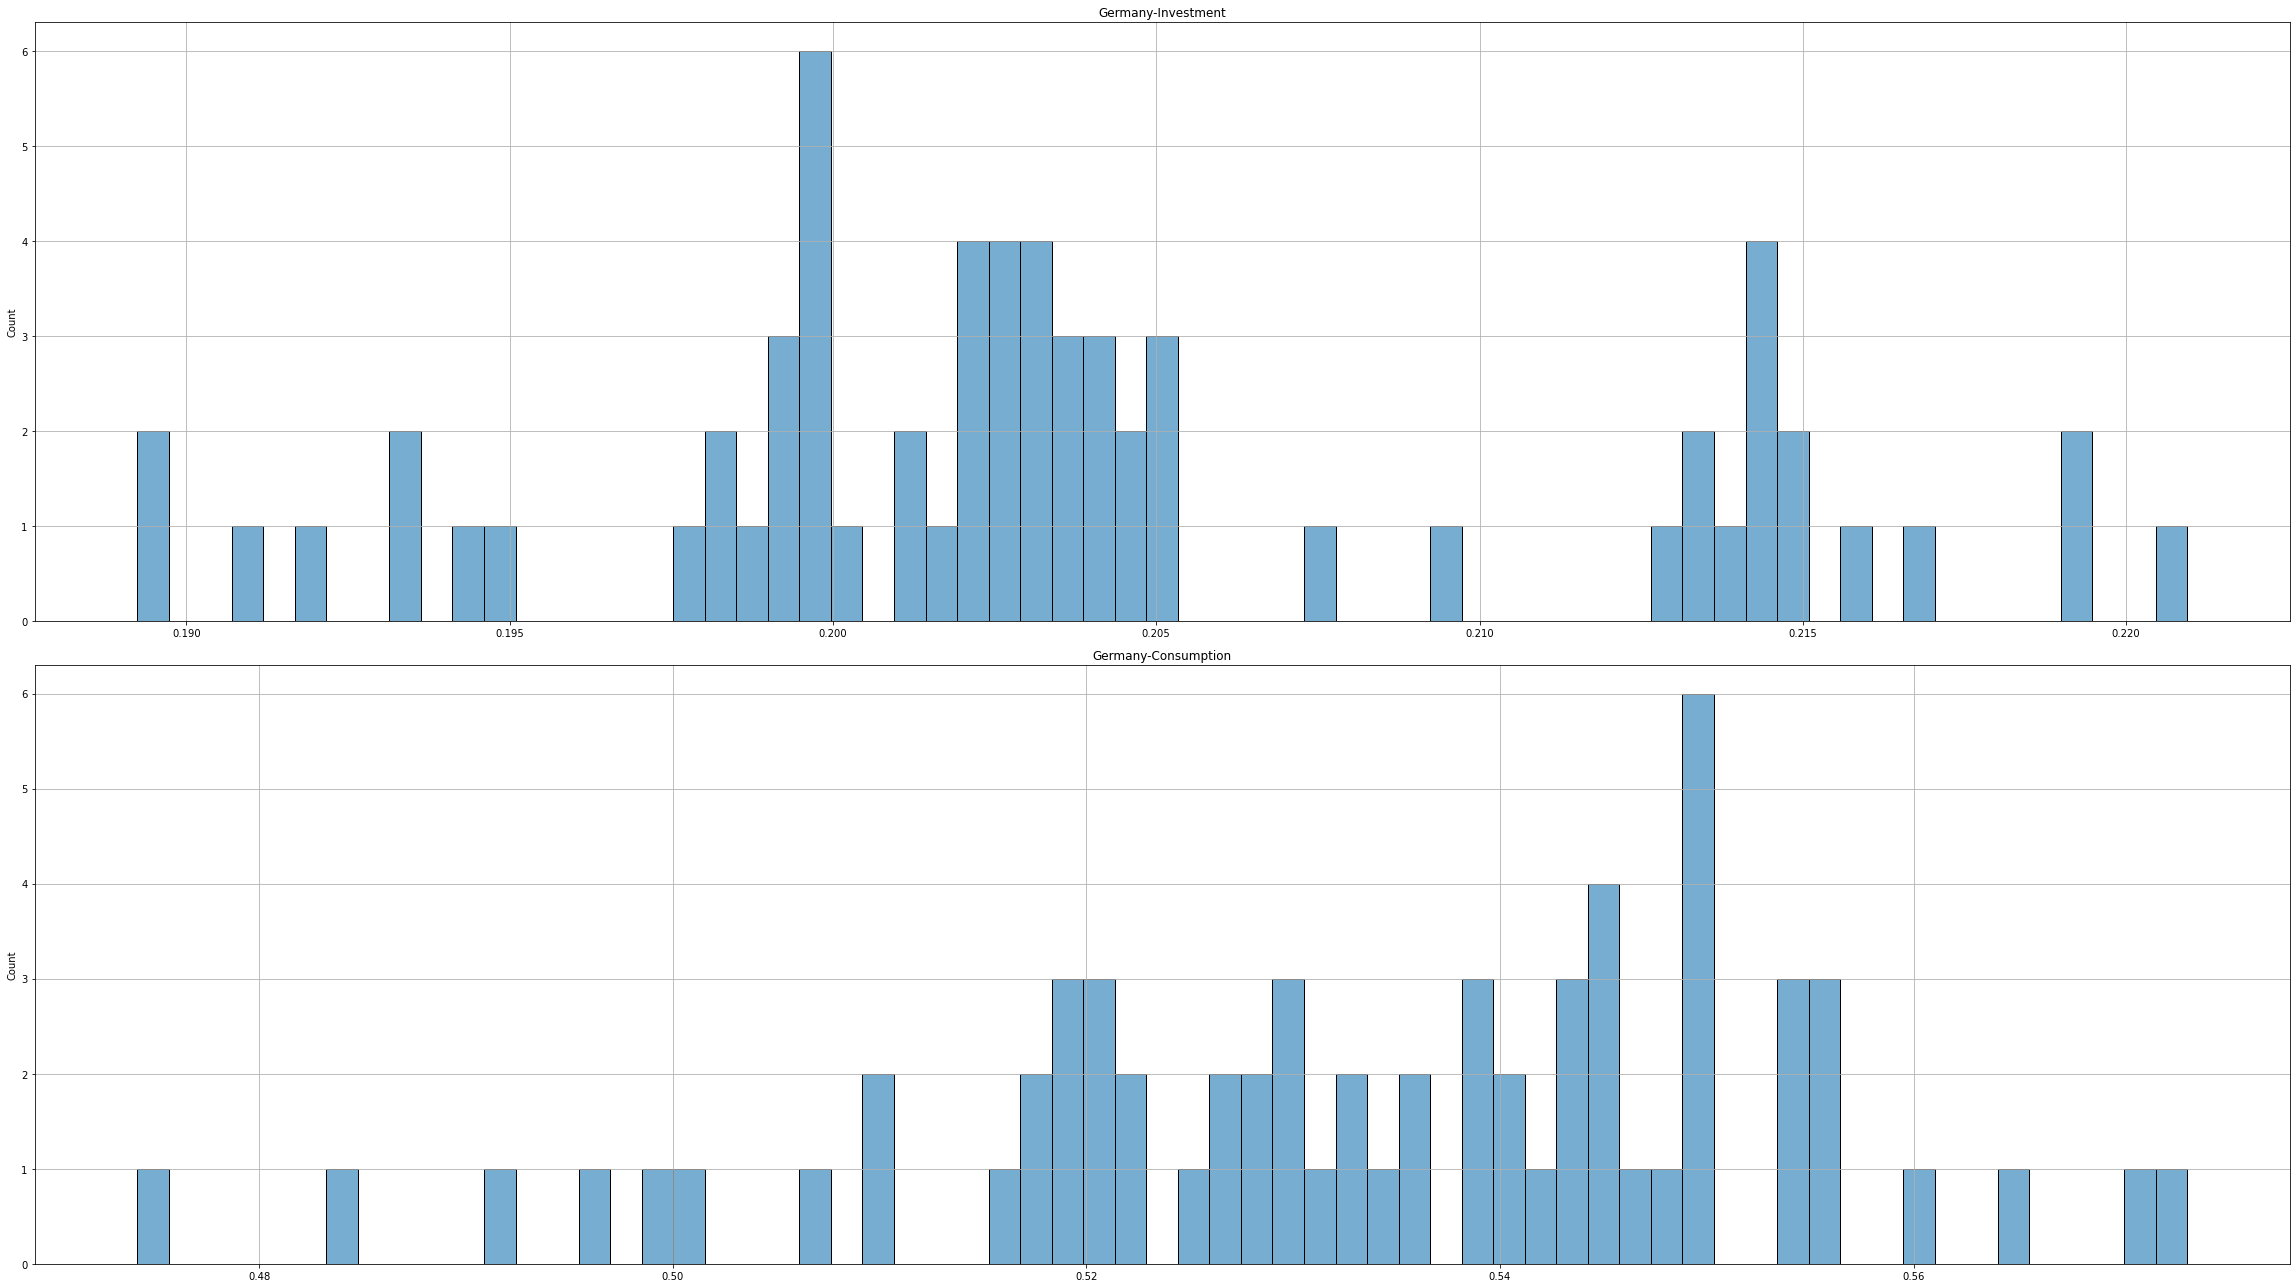

In [34]:
fig, axes = plt.subplots(nrows=2 , ncols=1, figsize=(32,18))
axes1 = sns.histplot(
    real_i_ger['Investment_ger']/gdp_ger['gdp_ger'],
    bins=df_result.shape[0],
    ax =axes[0],
    alpha=0.6
)
axes1.set_title('Germany-Investment')
axes1.grid(True)
axes2 = sns.histplot(
    real_c_ger['Consumption_ger']/gdp_ger['gdp_ger'],
    bins=df_result.shape[0],
    ax=axes[1],
    alpha=0.6
)
axes2.set_title('Germany-Consumption')
axes2.grid(True)
fig.tight_layout()

In [35]:
median_i = (real_i_ger['Investment_ger']/gdp_ger['gdp_ger']).median()
median_c = (real_c_ger['Consumption_ger']/gdp_ger['gdp_ger']).median()
median_i_ger = 'The median of private investment to GDP: {i}'.format(i=median_i)
median_c_ger = 'The median of private consumption to GDP: {c}'.format(c=median_c)
print(median_i_ger)
print(median_c_ger)

The median of private investment to GDP: 0.20289078608993813
The median of private consumption to GDP: 0.5353782558658431


## Business Cycle Standard Deviation

In [36]:
us_gdp_std = df_decomp_us['us_cycle'].std()
us_i_std = decomp_invest_us['us_invest_cycle'].std()
us_c_std = decomp_consump_us['us_consump_cycle'].std()
#----------------
tur_gdp_std = df_decomp_tur['tur_cycle'].std()
tur_i_std = decomp_invest_tur['tur_invest_cycle'].std()
tur_c_std = decomp_consump_tur['tur_consump_cycle'].std()
#----------------
ger_gdp_std = df_decomp_ger['ger_cycle'].std()
ger_i_std = decomp_invest_ger['ger_invest_cycle'].std()
ger_c_std = decomp_consump_ger['ger_consump_cycle'].std()

In [37]:
volatility_table = pd.DataFrame({'\u03C3': ['\u03C3y', '\u03C3c', '\u03C3i', '\u03C3c/\u03C3y','\u03C3i/\u03C3y'], 
        'Germany': [ger_gdp_std, ger_c_std, ger_i_std, ger_c_std/ger_gdp_std, ger_i_std/ger_gdp_std], 
        'Turkey': [tur_gdp_std, tur_c_std, tur_i_std, tur_c_std/tur_gdp_std, tur_i_std/tur_gdp_std],
        'United States': [us_gdp_std, us_c_std, us_i_std, us_c_std/us_gdp_std, us_i_std/us_gdp_std]}) 

volatility_table.set_index('\u03C3',inplace=True)

In [38]:
volatility_table

,Germany,Turkey,United States
σ,,,
σy,0.019842,0.033911,0.016021
σc,0.022230,0.041904,0.017563
σi,0.031619,0.082310,0.061955
σc/σy,1.120339,1.235730,1.096302
σi/σy,1.593531,2.427258,3.867212


## Business Cycle Correlation

In [39]:
df_result_2 = pd.concat([df_decomp_us['us_cycle'],decomp_invest_us['us_invest_cycle'],decomp_consump_us['us_consump_cycle'],
                         df_decomp_ger['ger_cycle'],decomp_invest_ger['ger_invest_cycle'],decomp_consump_ger['ger_consump_cycle'],
                         df_decomp_tur['tur_cycle'],decomp_invest_tur['tur_invest_cycle'],decomp_consump_tur['tur_consump_cycle']]
                        ,axis=1)

In [40]:
df_result_2.tail()

,us_cycle,us_invest_cycle,us_consump_cycle,ger_cycle,ger_invest_cycle,ger_consump_cycle,tur_cycle,tur_invest_cycle,tur_consump_cycle
2021-01-01,-0.006685,-0.011991,-0.004880,-0.022811,-0.021688,-0.075152,0.006969,0.038292,-0.028407
2021-04-01,0.005429,-0.029936,0.018166,-0.008469,0.000372,-0.036813,0.012025,0.038770,-0.019043
2021-07-01,0.006911,-0.008914,0.017601,0.007464,-0.008870,0.028404,0.027591,0.017883,0.043502
2021-10-01,0.019343,0.060981,0.018366,0.015835,-0.003531,0.024336,0.030733,0.004936,0.116723
2022-01-01,0.011135,0.064929,0.017411,0.030037,0.037467,0.045350,0.030794,0.021650,0.071549


In [41]:
corr_coeff_table = df_result_2.corr()
corr_coeff_table

,us_cycle,us_invest_cycle,us_consump_cycle,ger_cycle,ger_invest_cycle,ger_consump_cycle,tur_cycle,tur_invest_cycle,tur_consump_cycle
us_cycle,1.000000,0.759652,0.945022,0.892494,0.654115,0.760834,0.714539,0.425244,0.637930
us_invest_cycle,0.759652,1.000000,0.571716,0.769341,0.698452,0.482639,0.776012,0.685163,0.683667
us_consump_cycle,0.945022,0.571716,1.000000,0.834018,0.569795,0.751344,0.651356,0.333280,0.607547
ger_cycle,0.892494,0.769341,0.834018,1.000000,0.861297,0.754309,0.778739,0.583106,0.687357
ger_invest_cycle,0.654115,0.698452,0.569795,0.861297,1.000000,0.536975,0.629714,0.568159,0.493078
ger_consump_cycle,0.760834,0.482639,0.751344,0.754309,0.536975,1.000000,0.451676,0.145026,0.514582
tur_cycle,0.714539,0.776012,0.651356,0.778739,0.629714,0.451676,1.000000,0.873085,0.870645
tur_invest_cycle,0.425244,0.685163,0.333280,0.583106,0.568159,0.145026,0.873085,1.000000,0.733292
tur_consump_cycle,0.637930,0.683667,0.607547,0.687357,0.493078,0.514582,0.870645,0.733292,1.000000


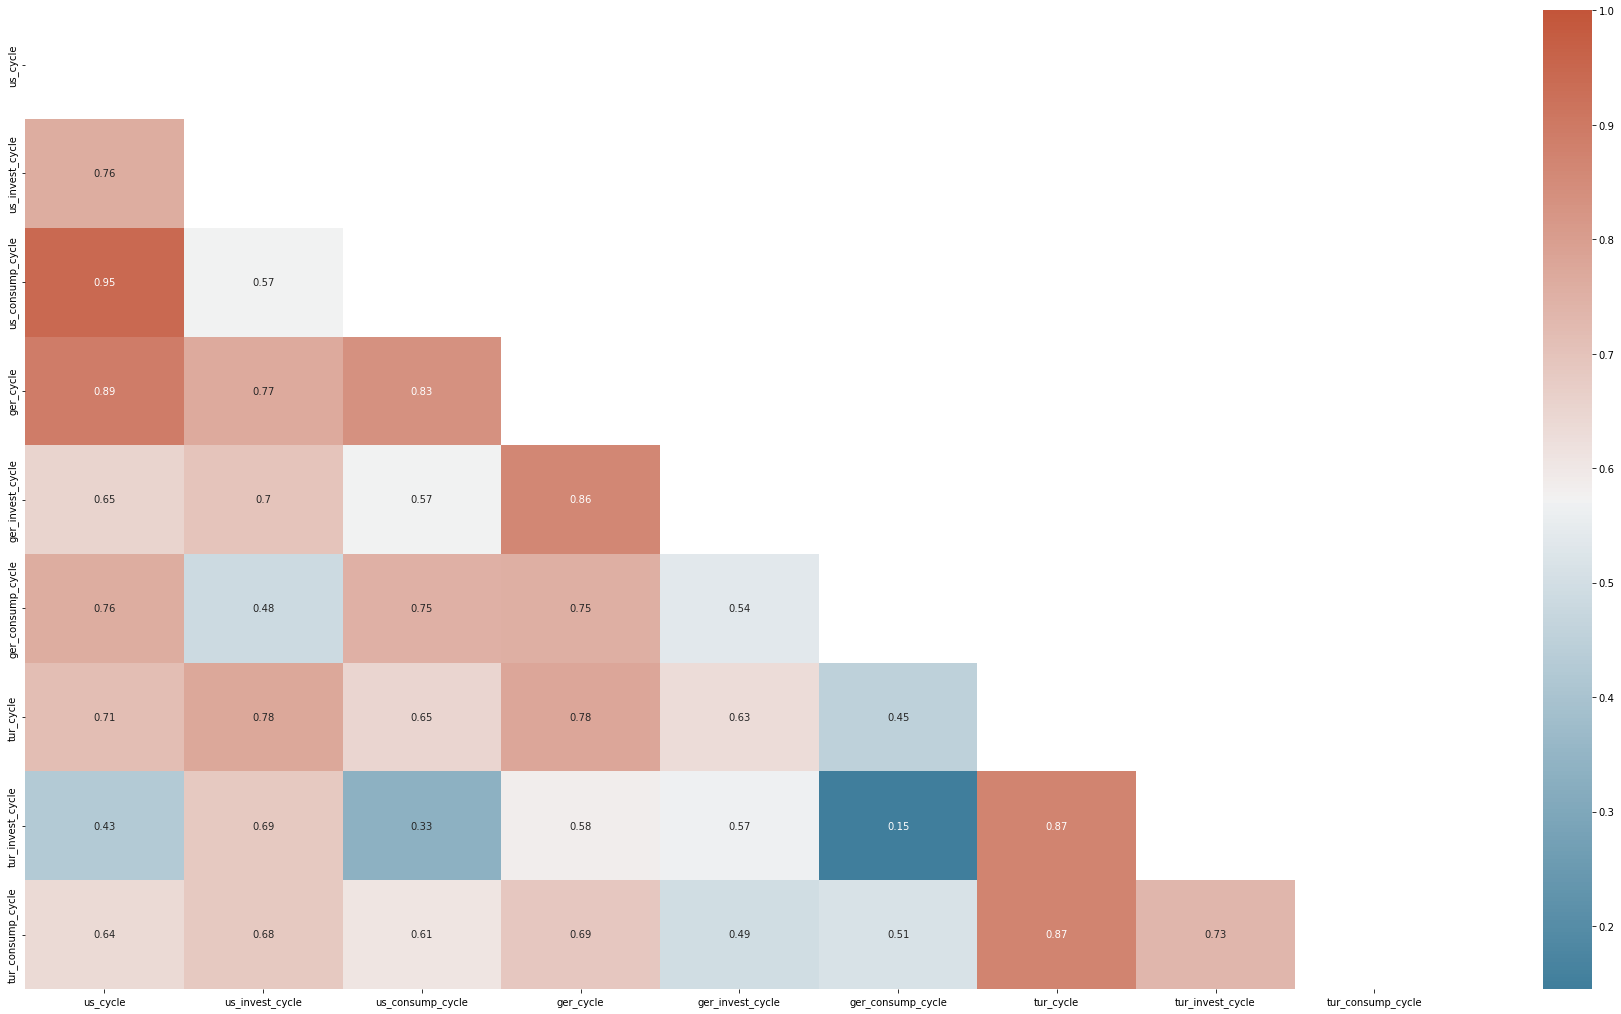

In [42]:
fig, ax = plt.subplots(figsize=(32, 18))
corr_coeff_table
mask = np.triu(np.ones_like(corr_coeff_table, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_coeff_table,annot=True,vmax=1, mask = mask, cmap=cmap);